# Maximizing Customer Retention: Fairway Bank (EDA)

As we proceed to help Fairway Bank reduce customer churn by 10%, we turn to Exploratory Data Analysis. Information on data wrangling can be found __[here](https://github.com/david92russell/Bank_Customer_Churn/blob/main/data_wrangling.ipynb)__.

## Load Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [115]:
df = pd.read_csv('bank_clean.csv', index_col=0)

In [117]:
df.head()

credit_score country  gender  age  tenure    balance  num_products  \
0           619  France  Female   42       2       0.00             1   
1           608   Spain  Female   41       1   83807.86             1   
2           502  France  Female   42       8  159660.80             3   
3           699  France  Female   39       1       0.00             2   
4           850   Spain  Female   43       2  125510.82             1   

   credit_card  active     salary  churn  complain  satisfaction card_type  \
0            1       1  101348.88      1         1             2   DIAMOND   
1            0       1  112542.58      0         1             3   DIAMOND   
2            1       0  113931.57      1         1             3   DIAMOND   
3            0       0   93826.63      0         0             5      GOLD   
4            1       1   79084.10      0         0             5      GOLD   

   points  
0     464  
1     456  
2     377  
3     350  
4     425

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credit_score  10000 non-null  int64  
 1   country       10000 non-null  object 
 2   gender        10000 non-null  object 
 3   age           10000 non-null  int64  
 4   tenure        10000 non-null  int64  
 5   balance       10000 non-null  float64
 6   num_products  10000 non-null  int64  
 7   credit_card   10000 non-null  int64  
 8   active        10000 non-null  int64  
 9   salary        10000 non-null  float64
 10  churn         10000 non-null  int64  
 11  complain      10000 non-null  int64  
 12  satisfaction  10000 non-null  int64  
 13  card_type     10000 non-null  object 
 14  points        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


## Explore Distributions

In [122]:
# Create lists of numerical columns and categorical columns
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'num_products', 'salary', 'satisfaction', 'points']
cat_cols = ['gender', 'credit_card', 'active', 'churn', 'complain', 'country', 'card_type']

In [124]:
df[num_cols].describe()

credit_score           age        tenure        balance  num_products  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288      1.530200   
std       96.653299     10.487806      2.892174   62397.405202      0.581654   
min      350.000000     18.000000      0.000000       0.000000      1.000000   
25%      584.000000     32.000000      3.000000       0.000000      1.000000   
50%      652.000000     37.000000      5.000000   97198.540000      1.000000   
75%      718.000000     44.000000      7.000000  127644.240000      2.000000   
max      850.000000     92.000000     10.000000  250898.090000      4.000000   

              salary  satisfaction        points  
count   10000.000000  10000.000000  10000.000000  
mean   100090.239881      3.013800    606.515100  
std     57510.492818      1.405919    225.924839  
min        11.580000      1.000000    119.000000  
25%     51002.110000      2.000000    410.000000  
50%    100193.915000      3.000000    605.000000  
75%    149388.247500      4.000000    801.000000  
max    199992.480000      5.000000   1000.000000

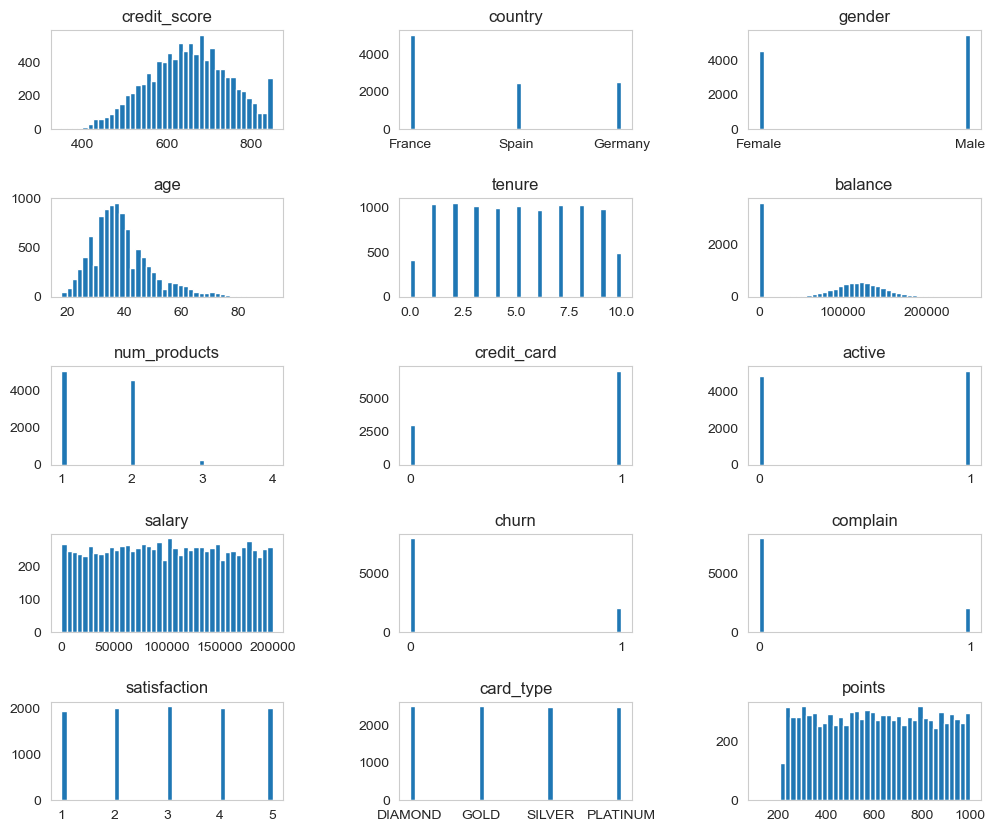

In [126]:
# Review histograms
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10))
plt.subplots_adjust(hspace=0.7, wspace=0.5);

for (col, ax) in zip(df.columns, axes.flatten()):
    df[col].hist(ax=ax, bins=40, grid=False)
    ax.set_title(col)
    if col in ['credit_card', 'active', 'churn', 'complain']:
        ax.set_xticks([0,1])

Both credit score and balance are bimodal, with a normal distribution centered around 650 and 125,000 respectively, and additional spikes at the max and min fo each distribution respectively. The churn distribtution indicates that about 8/10 customers retained. The goal is to increase this to 9/10.

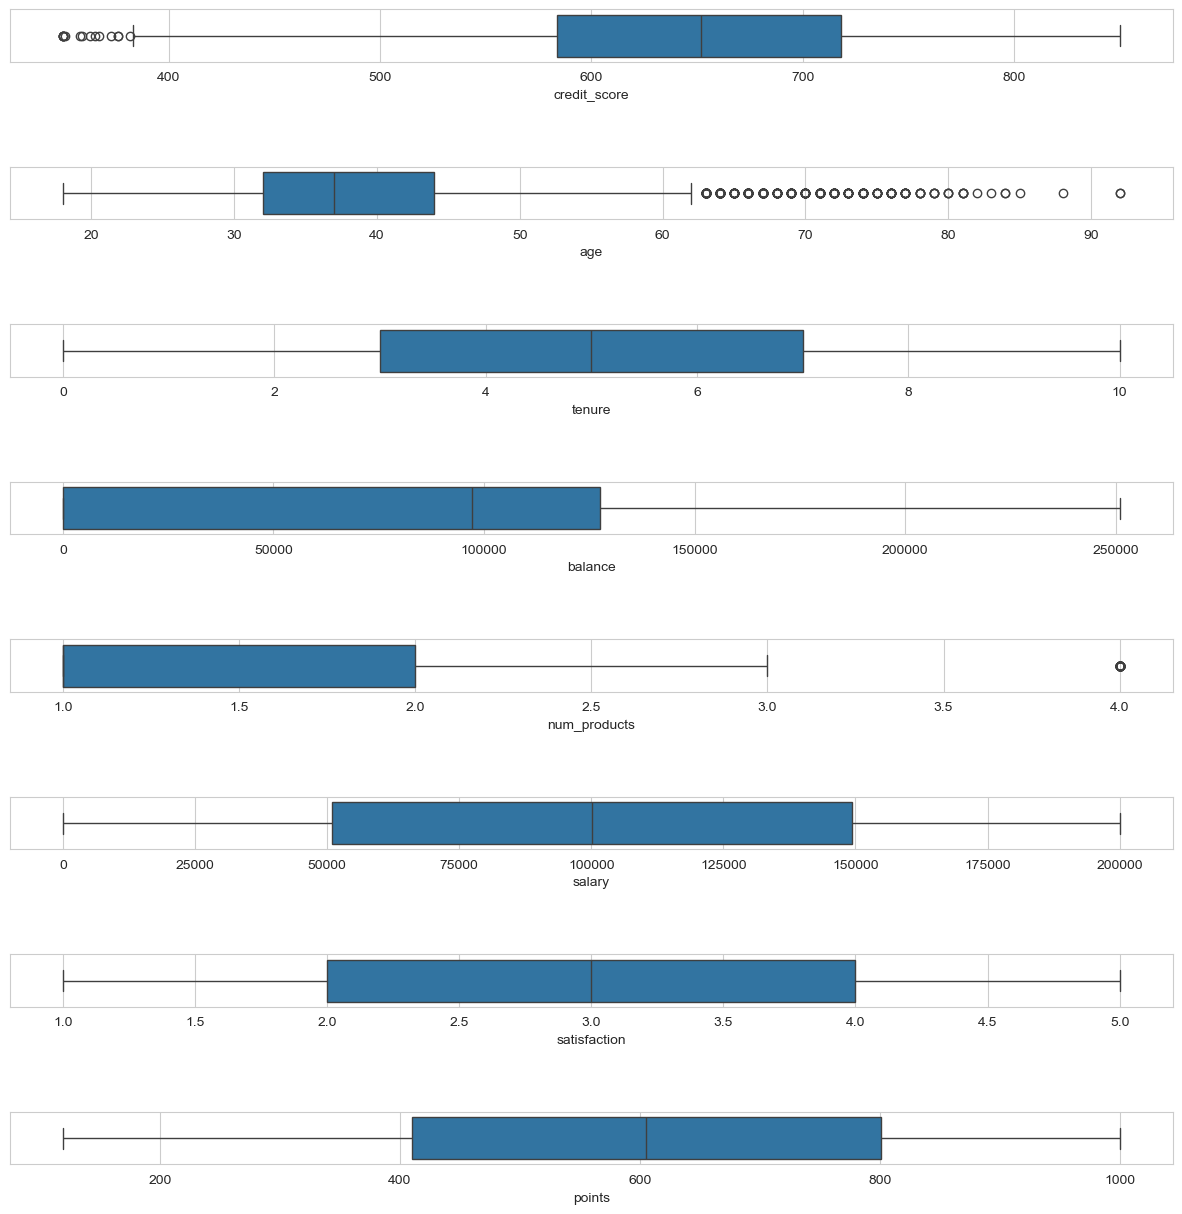

In [186]:
# Explore box plots of numerical columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(15, 15))
fig.subplots_adjust(hspace=2)

for (col, ax) in zip(num_cols, axes.flatten()):
    sns.boxplot(data=df[num_cols], x=col, ax=ax);

These box plots demonstrate the median, quartiles, and outliers of the quantitative data columns. We can see that most of the features don't have outliers. The only observable outliers are in credit score, age, and number of products. Most of these features have interquartile ranges (IQRs) that are fairly centered amidst the full range, though in the cases of balance and number of products, we see IQRs that span the lower half of the range. Regarding number of products, this makes sense as the majority of customers have either 1 or 2 products with the bank, with a small portion of the sample having 3 or 4. Regarding balance, the fact that the IQR spans the lower half of the total range is caused by the abundance of 0's, which represent about 1/3 of the rows for this column. This indicates that 1/3 of customers have no remaining balance in their account.

## Explore Correlations

In [133]:
df[num_cols].corr()

credit_score       age    tenure   balance  num_products  \
credit_score      1.000000 -0.003965  0.000842  0.006268      0.012238   
age              -0.003965  1.000000 -0.009997  0.028308     -0.030680   
tenure            0.000842 -0.009997  1.000000 -0.012254      0.013444   
balance           0.006268  0.028308 -0.012254  1.000000     -0.304180   
num_products      0.012238 -0.030680  0.013444 -0.304180      1.000000   
salary           -0.001384 -0.007201  0.007784  0.012797      0.014204   
satisfaction     -0.012599 -0.000876  0.008663 -0.002588     -0.011394   
points            0.000077  0.002222 -0.010196  0.014608     -0.015330   

                salary  satisfaction    points  
credit_score -0.001384     -0.012599  0.000077  
age          -0.007201     -0.000876  0.002222  
tenure        0.007784      0.008663 -0.010196  
balance       0.012797     -0.002588  0.014608  
num_products  0.014204     -0.011394 -0.015330  
salary        1.000000     -0.013747 -0.001515  
satisfaction -0.013747      1.000000 -0.014400  
points       -0.001515     -0.014400  1.000000

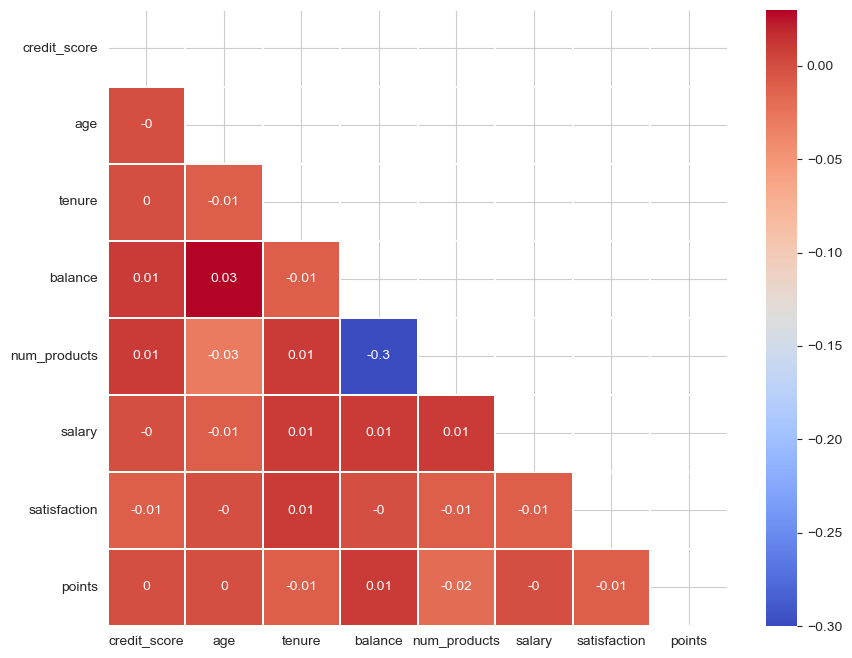

In [135]:
# Visualize correlations with heat map
plt.figure(figsize=(10,8))
sns.heatmap(round(df[num_cols].corr(),2), linewidths=.1, cmap='coolwarm', annot=True, mask=np.triu(df[num_cols].corr()))
plt.yticks(rotation=0);

The numerical variables do not appear to exhibit linear correlations. The only correlation that can be deemed __['weak',](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html)__ rather than 'very weak', is between number of products and balance, with a negative correlation of -0.3.

In [138]:
# Explore pairwise scatterplots between numerical columns
def scatter_pairs(x, y_start, y_finish):
    '''For ease of viewing, this function produces two side by side scatterplots
       with customizeable axes and compares points across the target variable outcome of 
       whether a customer churned or retained'''
    fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
    for (col, ax) in zip(num_cols[y_start:y_finish], axes.flatten()):
        sns.scatterplot(df, x=x, y=col, hue='churn', ax=ax);

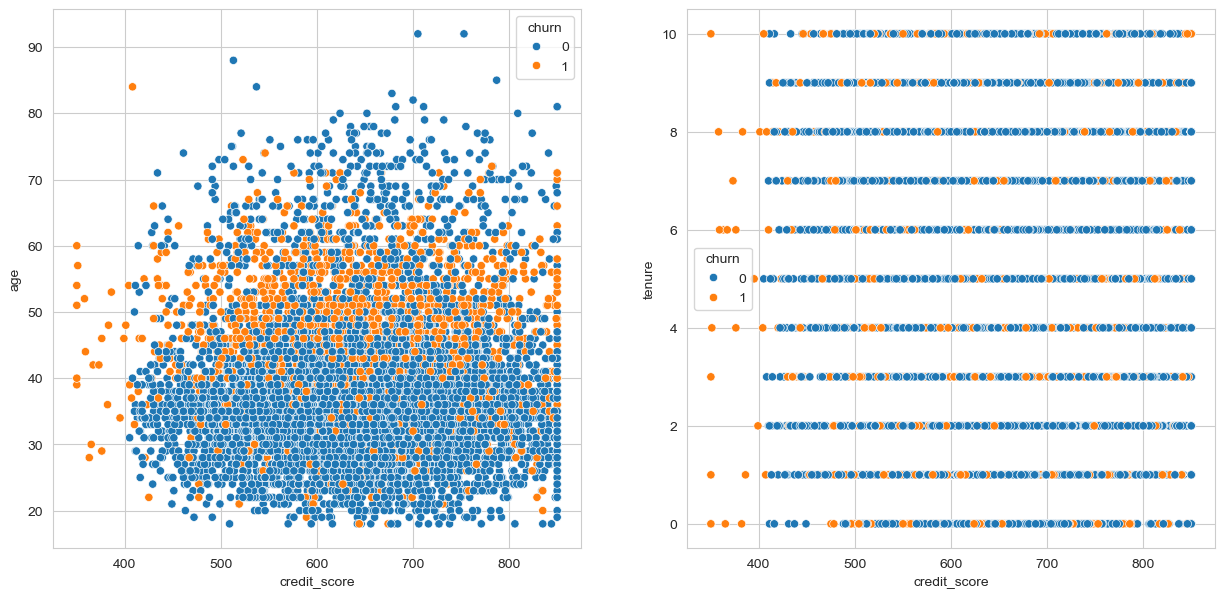

In [140]:
# Credit Score x Age
# Credit Score x Tenure
scatter_pairs('credit_score', 1, 3)

There aren't any observable linear correlations here, but we do see that churn seems to be most conentrated amongst customers between about 40 and 70 years old. We also see that any customers with a credit score below 400 churned.

In [143]:
# Confirm that all customers with credit score below 400 churned
df[(df['churn'] == 0) & (df['credit_score'] < 400)].shape[0]

0

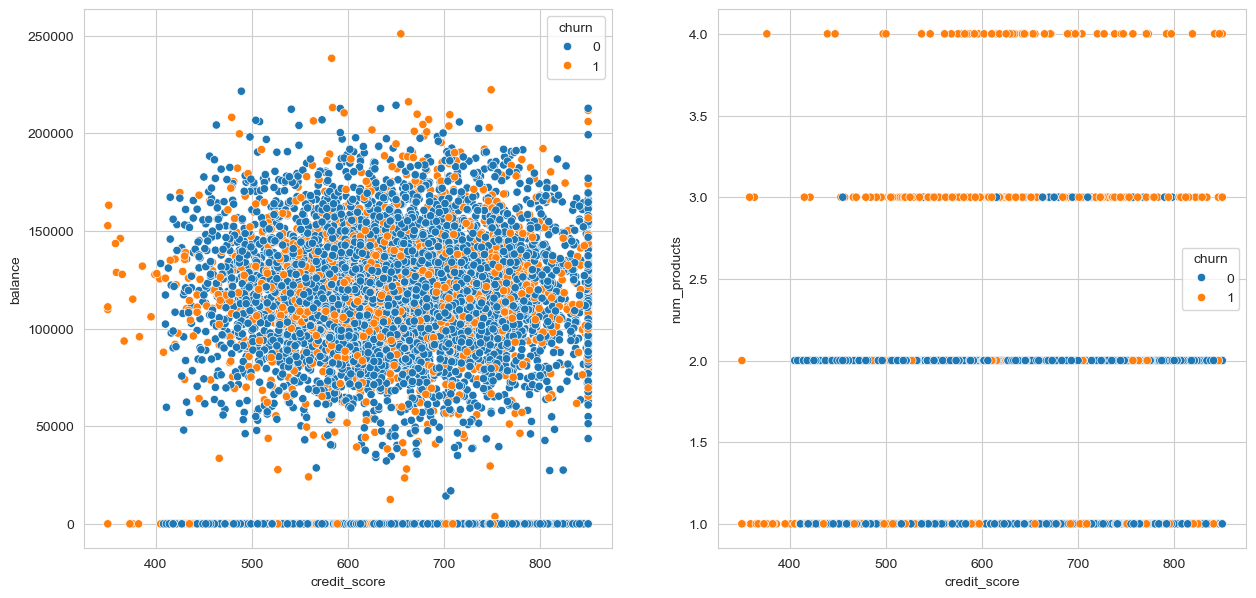

In [145]:
# Credit Score x Balance
# Credit Score x Number of Products
scatter_pairs('credit_score', 3, 5)

There is a large proportion of cusomers with a balance of 0. The main distribution ranges between about €50,000 - 200,000.

We observe a valuable insight regarding number of products! Most customers with 3 products churned, and seemingly all with 4 products churned. Customers with 2 products or 1 product appear to retain more often than churn. We also see that the customers with the lowest credit scores only have 1 product, and as number of products increases, credit score has a higher minimum.

In [148]:
# Check how many customers churned vs. retained based on number of products
for i in range(1,5):
    print(i, 'products:', df[(df['num_products'] == i) & (df['churn'] == 0)].shape[0], 'retained \\', \
          df[(df['num_products'] == i) & (df['churn'] == 1)].shape[0], 'churned')

1 products: 3675 retained \ 1409 churned
2 products: 4241 retained \ 349 churned
3 products: 46 retained \ 220 churned
4 products: 0 retained \ 60 churned


This insight alone might imply that it would be advantageous for Fairway to reduce its product supply to only 2 options, or limit customers to up to 2 products.

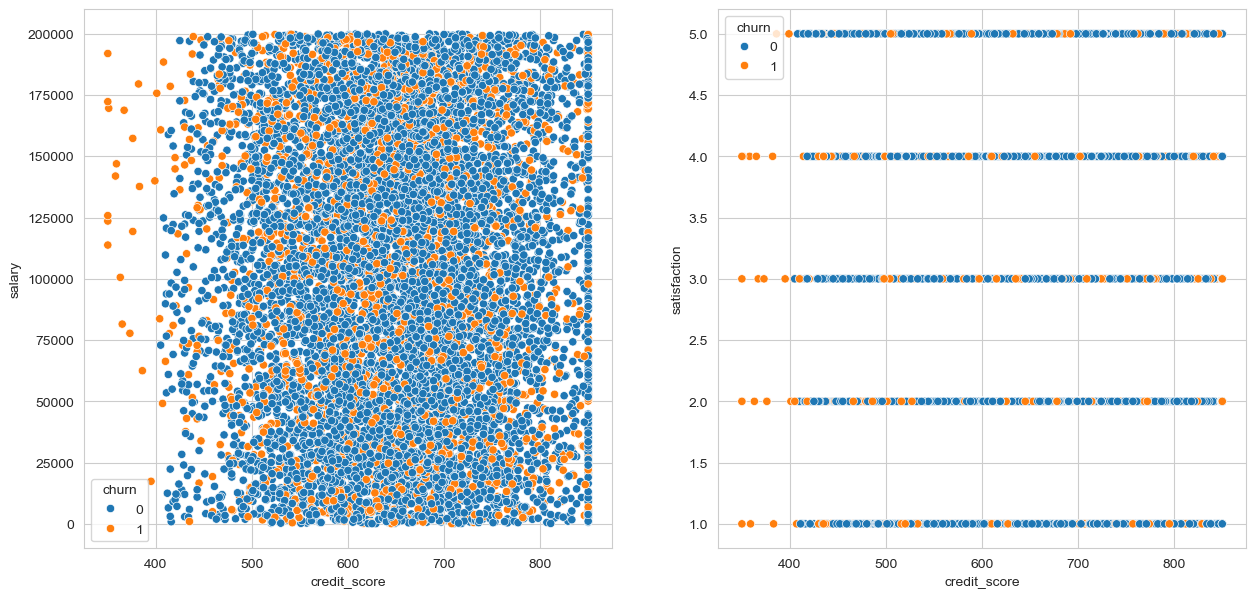

In [151]:
# Credit Score x Salary
# Credit Score x Satisfaction
scatter_pairs('credit_score', 5, 7)

There are no visible takeaways regarding credit score and salary or credit score and satisfaction score.

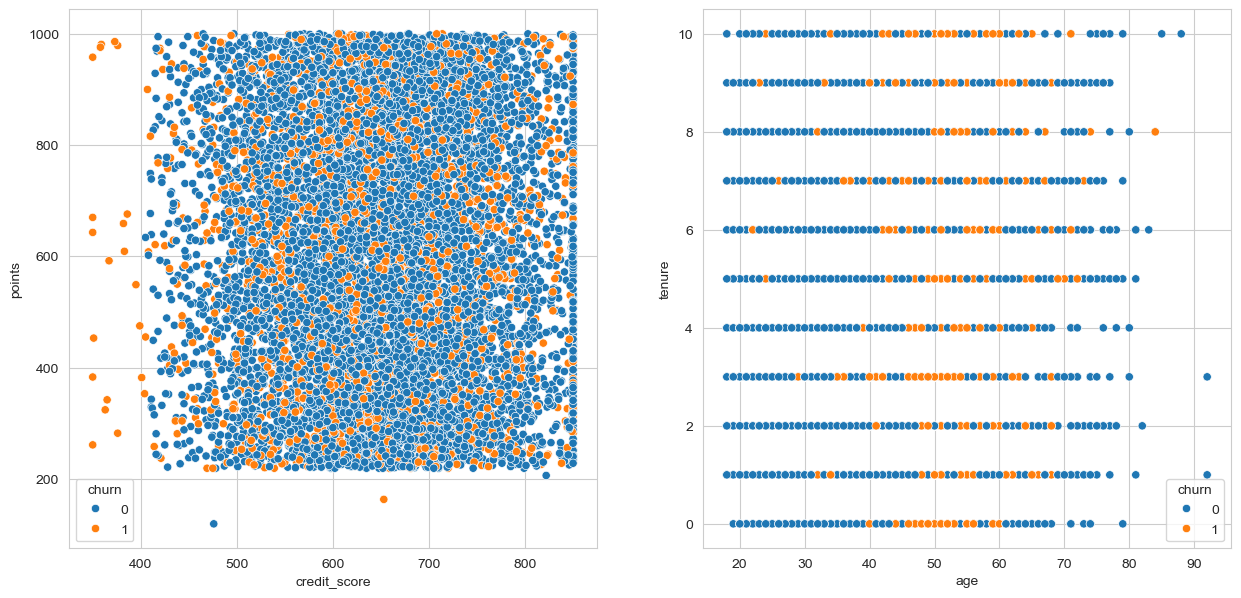

In [154]:
# The 'scatter_pairs' function only allows us to plot with the same x-axis; since we are changing over columns, we will manually plot the next pair
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

# Credit Score x Points Earned
# Age x Tenure
sns.scatterplot(df, x='credit_score', y='points', hue='churn', ax=axes[0]);
sns.scatterplot(df, x='age', y='tenure', hue='churn', ax=axes[1]);

Almost all customers earned at least 200 points. There aren't any noticeable correlations between age and tenure, though we see high churn clusters around age 45 to 65 with 0 years tenure, and this same age range with 3 years tenure.

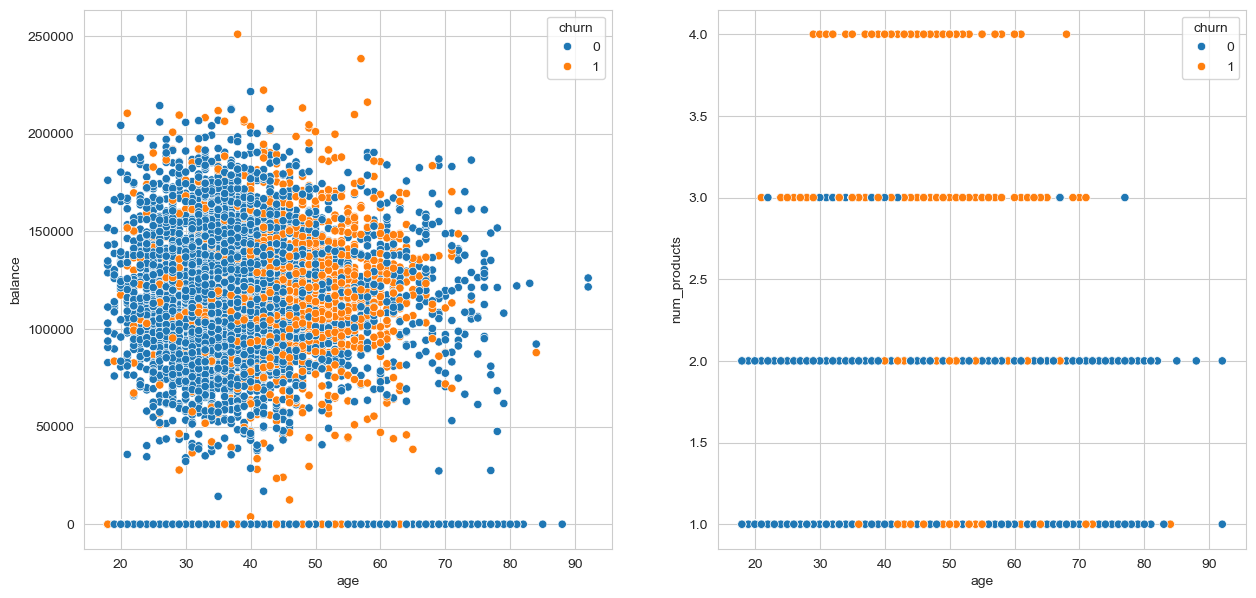

In [157]:
# Age x Balance
# Age x Number of Products
scatter_pairs('age', 3, 5)

Looking at the primary distribution for age and balance (not counting the 1/3 of customers with a balance of 0), younger and middle-aged customers have a wider range of balances than older customers. 

Age range is smallest for customers with 4 products, second smallest for customers with 3 products, and largest for customers with 2 or 1 product.

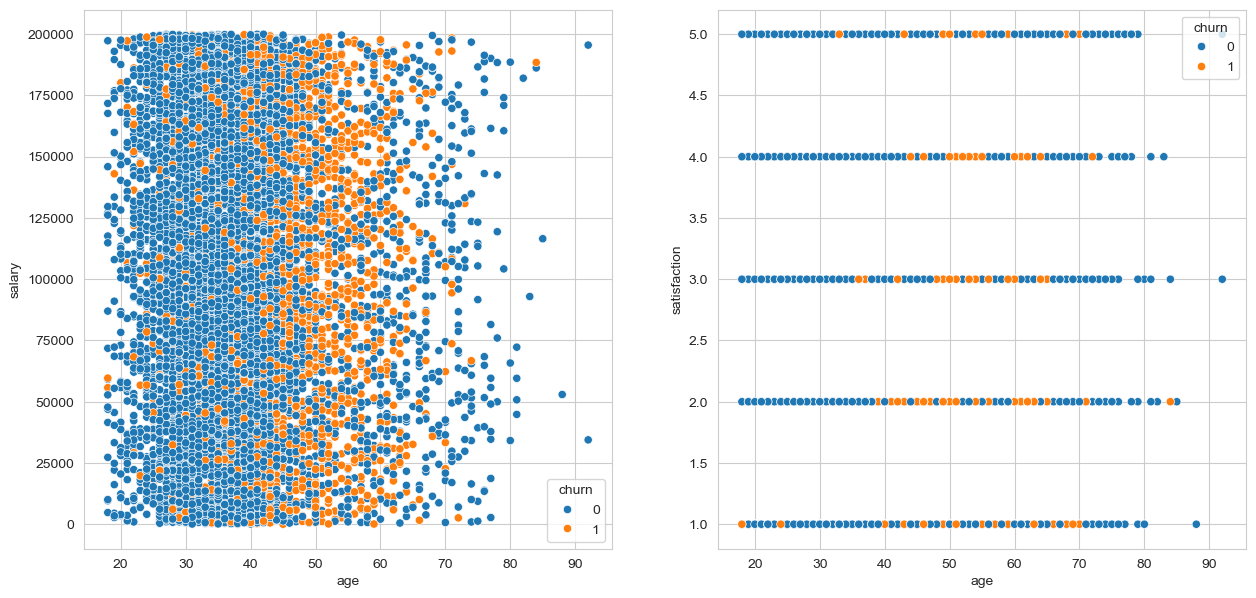

In [160]:
# Age x Salary
# Age x Satisfaction
scatter_pairs('age', 5, 7)

No noticeable correlation between age and salary or age and satisfaction score but we see some clusters of churn for customers in a given age range who reported the same satisfaction score, such as most customers between about 50 - 58 who reported a satisfaction score of 4 and churned.

In [163]:
# Check churn to retain ratio for customers from age 50-58 inclusive that reported satisfaction of 4
df['churn'][(df['age'] >= 50) & (df['age'] <= 58) & (df['satisfaction'] == 4)].value_counts()

churn
1    104
0     76
Name: count, dtype: int64

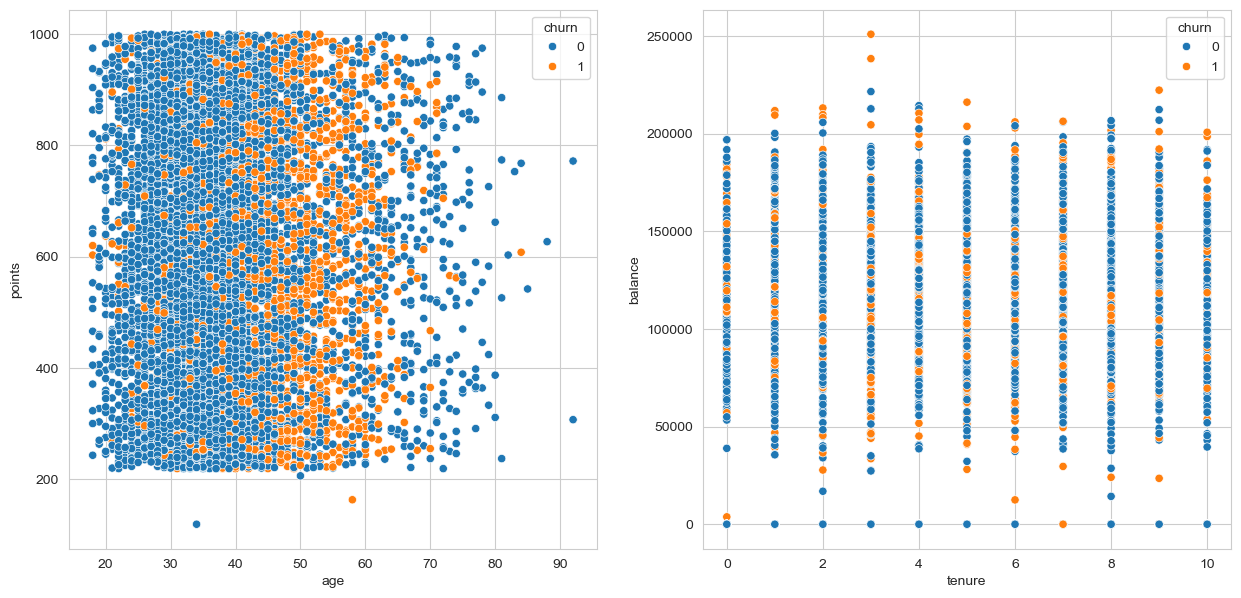

In [165]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

# Age x Points Earned
# Tenure x Balance
sns.scatterplot(df, x='age', y='points', hue='churn', ax=axes[0]);
sns.scatterplot(df, x='tenure', y='balance', hue='churn', ax=axes[1]);

There isn't a noticeable correlation between age and points earned or tenure and balance. We do see that the two customers with the highest balance had been with Fairway for 3 years, and both churned.

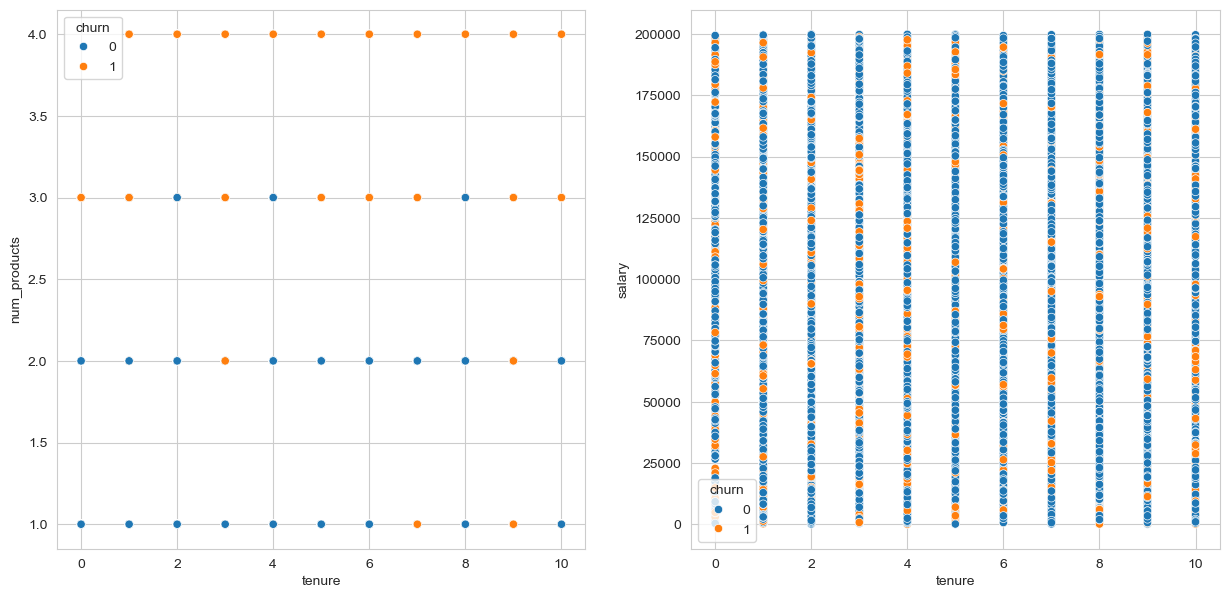

In [168]:
# Tenure x Number of Products
# Tenure x Salary
scatter_pairs('tenure', 4, 6)

We can't discern a correlation between tenure and number of products. We do see that there is a cluster of churn for 10-year customers with a salary between about €60,000 - 75,000.

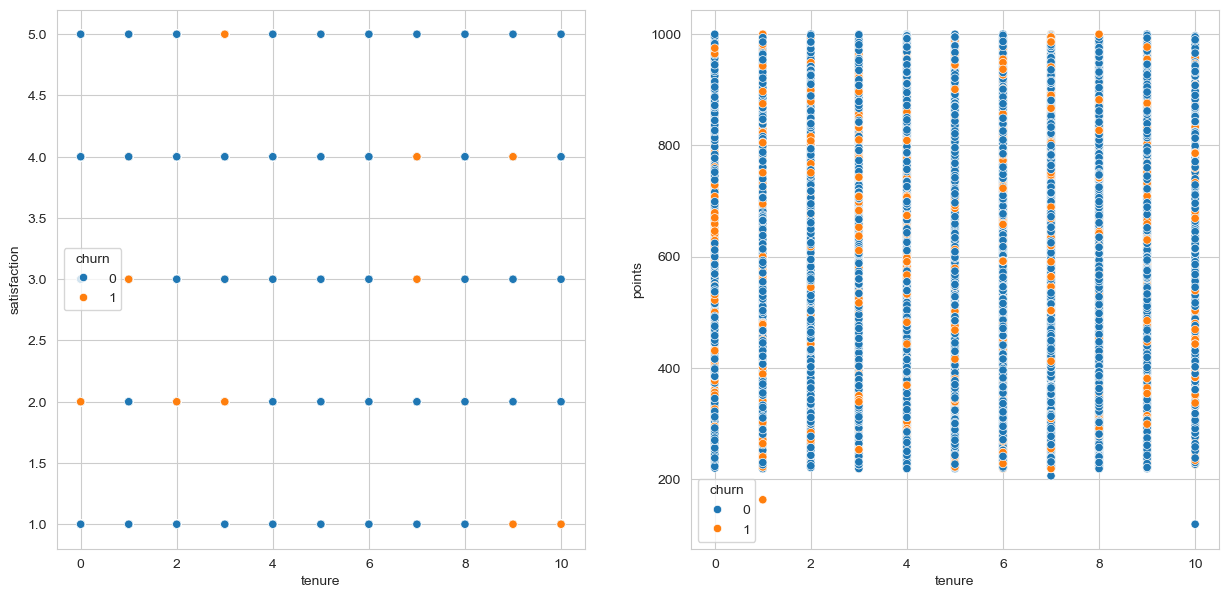

In [171]:
# Tenure x Satisfaction
# Tenure x Points Earned
scatter_pairs('tenure', 6, 8)

There aren't any noticeable correlation between tenure and satisfaction score or tenure and points earned.

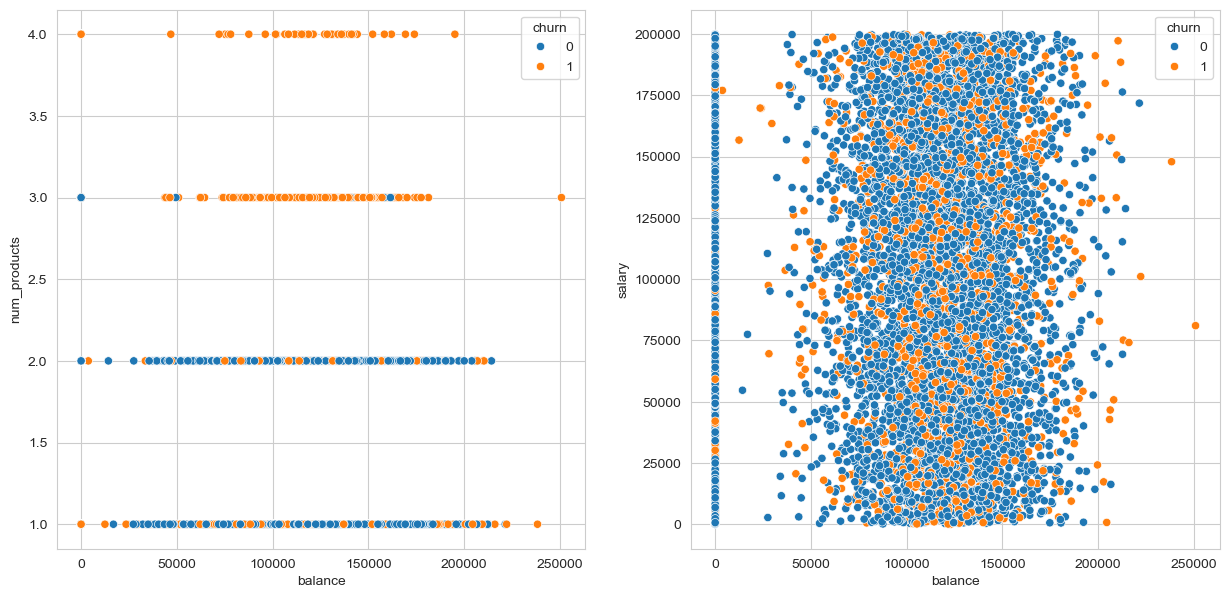

In [176]:
# Balance x Number of Products
# Balance x Salary
scatter_pairs('balance', 4, 6)

Fewer products associates with a larger range for balance. There isn't a noticeable correlation between balance and estimated salary.

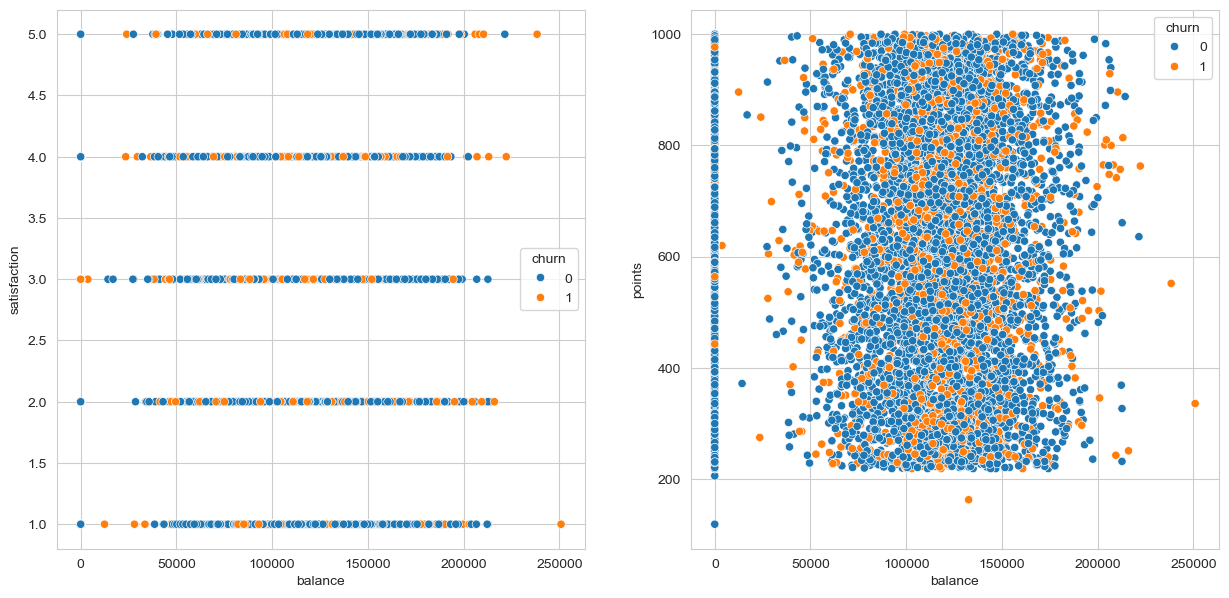

In [179]:
# Balance x Satisfaction
# Balance x Points Earned
scatter_pairs('balance', 6, 8)

There aren't any noticeable correlations between balance and satisfaction score or balance and points earned.

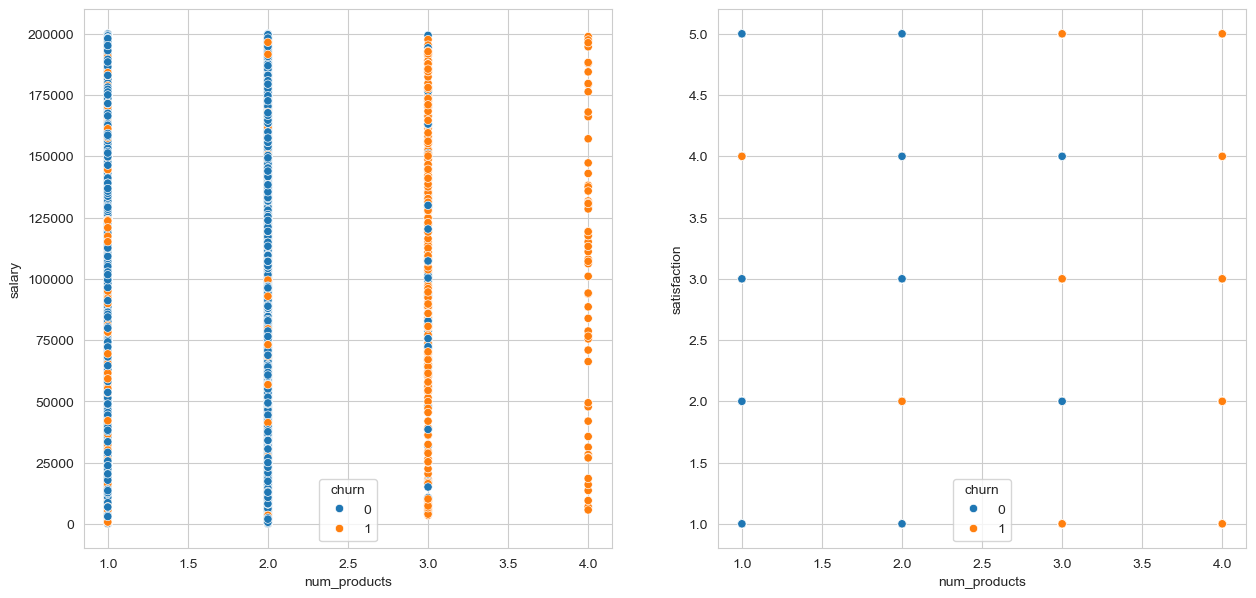

In [182]:
# Number of Products x Salary
# Number of Products x Satisfaction
scatter_pairs('num_products', 5, 7)

Again we see the large proportion of churned customers with 3 or 4 products, and conversely the large proportion of retained customers with 1 or 2 products. There is a cluster of churns for customers with 1 product and a balance between about €115,000 - 125,000. We can't discern a correlation between number of products and satisfaction score.

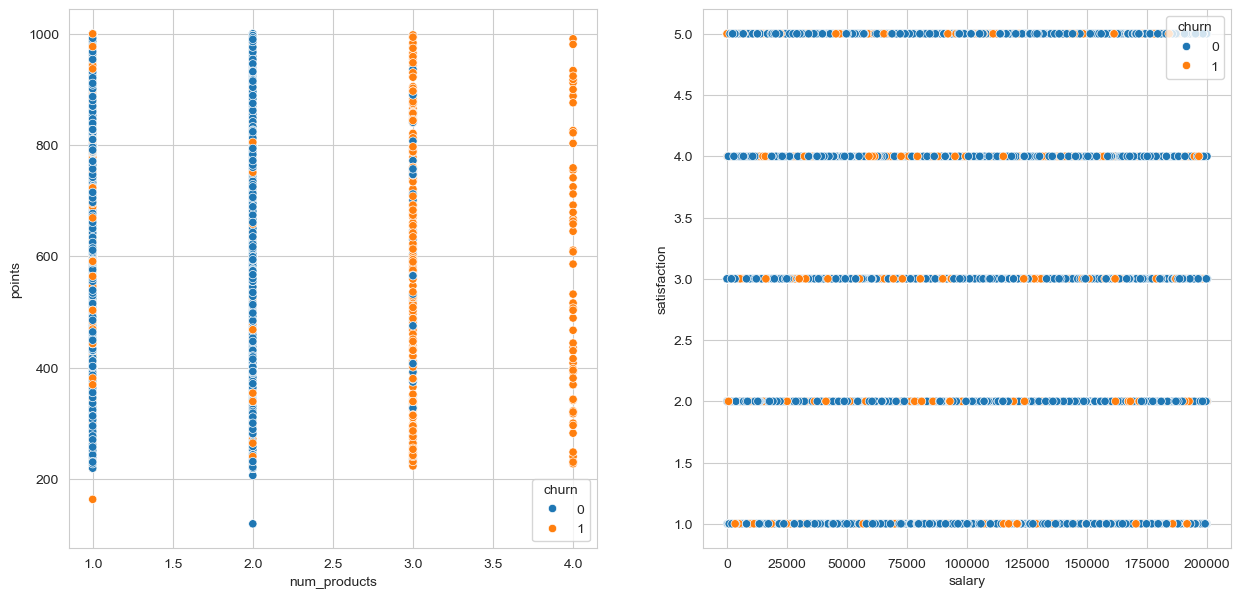

In [189]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

# Points Earned x Number of Products
# Estimated Salary x Satisfaction
sns.scatterplot(df, x='num_products', y='points', hue='churn', ax=axes[0]);
sns.scatterplot(df, x='salary', y='satisfaction', hue='churn', ax=axes[1]);

There aren't any noticeable correlations between number of products and points earned or salary and satisfaction score.

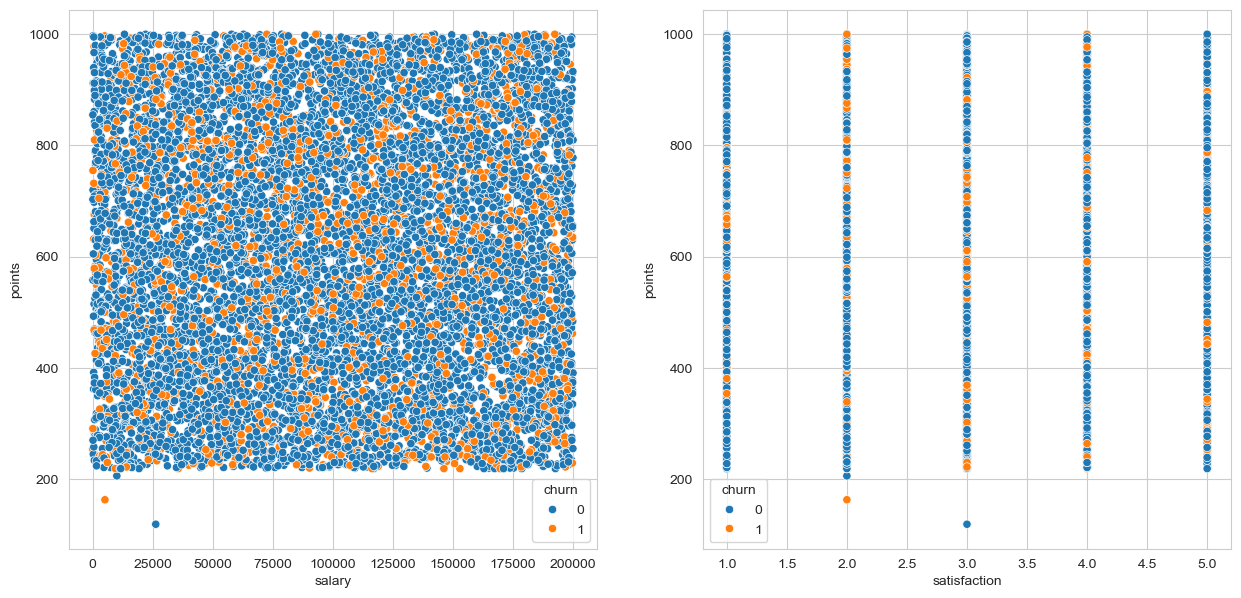

In [192]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 7))

# Salary x Points Earned
# Satisfaction x Points Earned
sns.scatterplot(df, x='salary', y='points', hue='churn', ax=axes[0]);
sns.scatterplot(df, x='satisfaction', y='points', hue='churn', ax=axes[1]);

We don't see any correlations between salary and points earned or satisfaction score and points earned.

## Explore Associations Between Categorical Variables

In [198]:
def bar_pairs(a, b, c, d):
    '''This function produces two side by side bar plots showing crosstab distributions
       for categorical variables'''
    fig, axes = plt.subplots(ncols=2, figsize=(15, 7))
    pd.crosstab(df[cat_cols[a]], df[cat_cols[b]]).plot.bar(ax=axes[0]);
    pd.crosstab(df[cat_cols[c]], df[cat_cols[d]]).plot.bar(ax=axes[1]);

### Gender

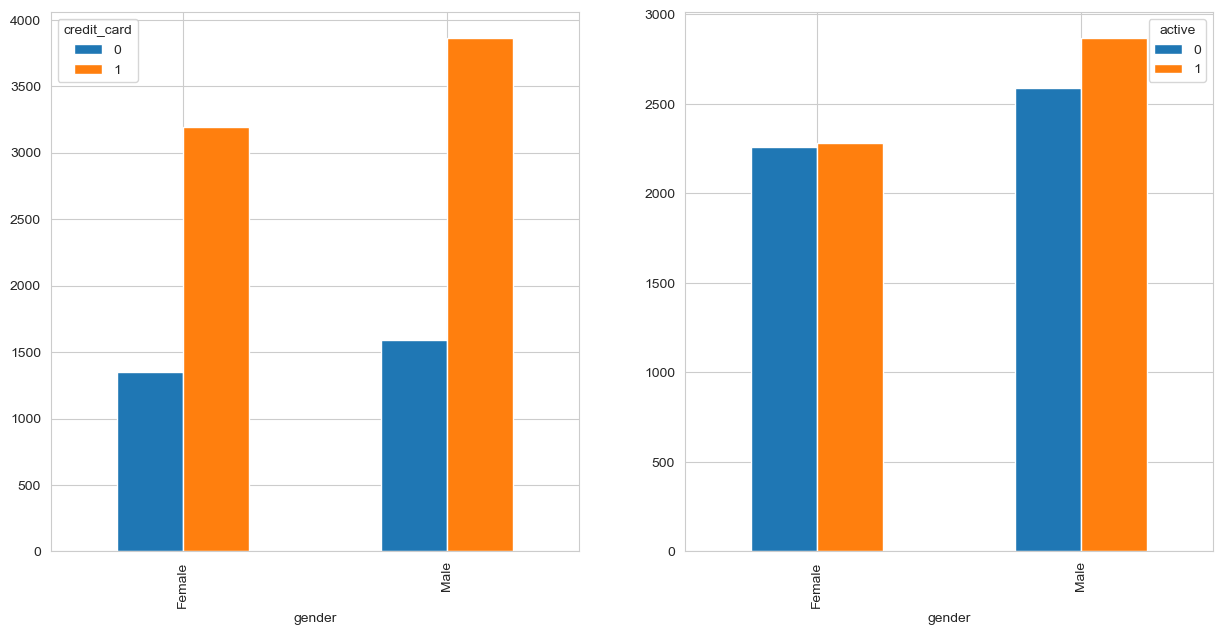

In [200]:
# Gender x Credit Card
# Gender x Active

bar_pairs(0, 1, 0, 2)

In [202]:
# Proportions of female and male customers with a credit card

total_female = df[df['gender'] == 'Female'].shape[0]
female_credit = df[(df['gender'] == 'Female') & (df['credit_card'] == 1)].shape[0]

total_male = df.shape[0] - total_female
male_credit = df[(df['gender'] == 'Male') & (df['credit_card'] == 1)].shape[0]

print(f'{round(female_credit / total_female * 100)}% of female customers have a credit card')
print(f'{round(male_credit / total_male * 100)}% of male customers have a credit card')

70% of female customers have a credit card
71% of male customers have a credit card


In [204]:
# Proportions of female and male customers that are active

female_active = df[(df['gender'] == 'Female') & (df['active'] == 1)].shape[0]

male_active = df[(df['gender'] == 'Male') & (df['active'] == 1)].shape[0]

print(f'{round(female_active / total_female * 100)}% of female customers are active')
print(f'{round(male_active / total_male * 100)}% of male customers are active')

50% of female customers are active
53% of male customers are active


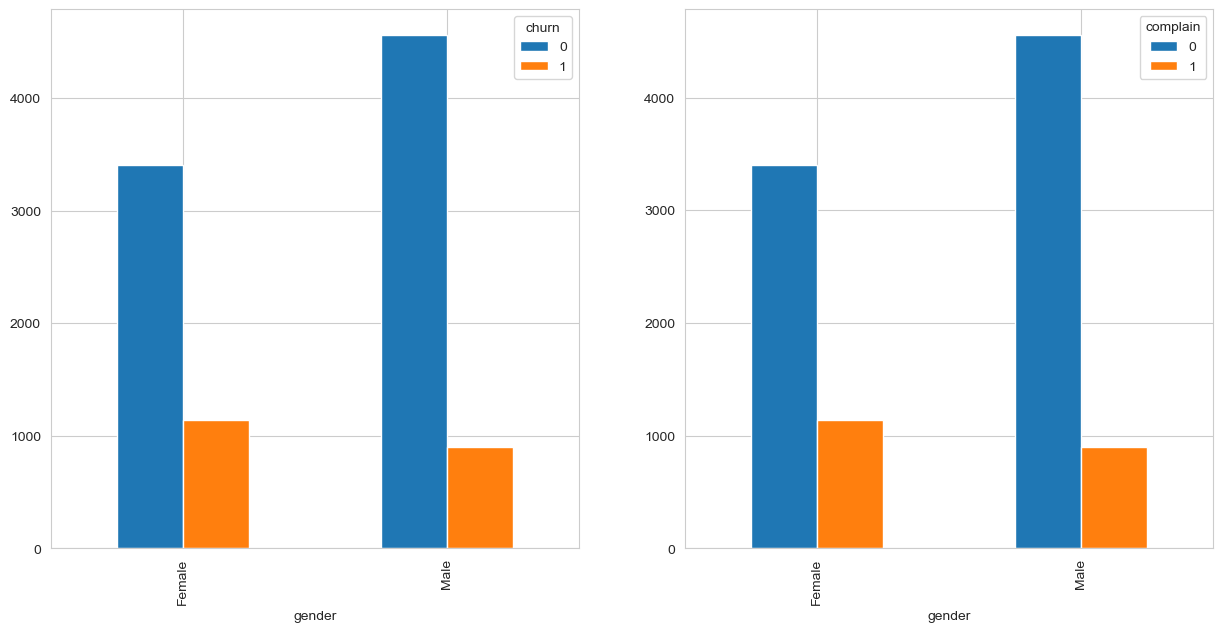

In [206]:
# Gender x Churn
# Gender x Complain

bar_pairs(0, 3, 0, 4)

In [208]:
# Proportions of female and male customers that churned

female_churn = df[(df['gender'] == 'Female') & (df['churn'] == 1)].shape[0]

male_churn = df[(df['gender'] == 'Male') & (df['churn'] == 1)].shape[0]

print(f'{round(female_churn / total_female * 100)}% of female customers churned')
print(f'{round(male_churn / total_male * 100)}% of male customers churned')

25% of female customers churned
16% of male customers churned


In [210]:
# Proportions of female and male customers that complained

female_complain = df[(df['gender'] == 'Female') & (df['complain'] == 1)].shape[0]

male_complain = df[(df['gender'] == 'Male') & (df['complain'] == 1)].shape[0]

print(f'{round(female_complain / total_female * 100)}% of female customers complained')
print(f'{round(male_complain / total_male * 100)}% of male customers complained')

25% of female customers complained
17% of male customers complained


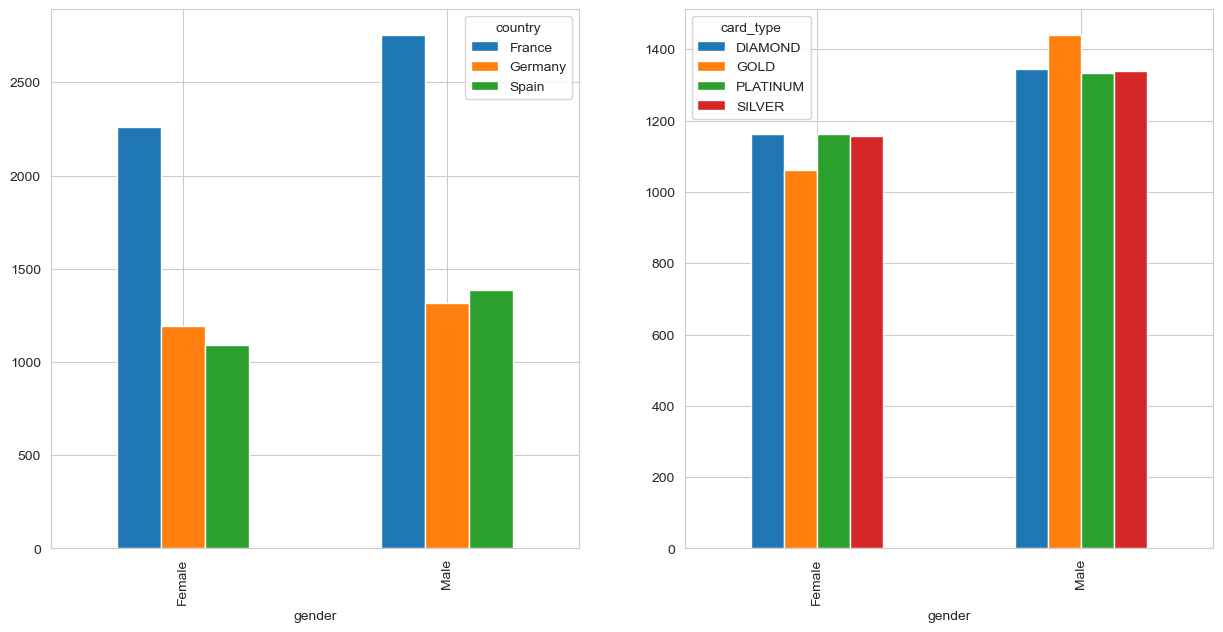

In [212]:
# Gender x Country
# Gender x Card Type

bar_pairs(0, 5, 0, 6)

In [214]:
# Proportions of female and male customers from each country

female_France = df[(df['gender'] == 'Female') & (df['country'] == 'France')].shape[0]
female_Germany = df[(df['gender'] == 'Female') & (df['country'] == 'Germany')].shape[0]
female_Spain = total_female - female_France - female_Germany

male_France = df[(df['gender'] == 'Male') & (df['country'] == 'France')].shape[0]
male_Germany = df[(df['gender'] == 'Male') & (df['country'] == 'Germany')].shape[0]
male_Spain = total_male - male_France - male_Germany

print(f'{round(female_France / total_female * 100)}% of female customers are from France')
print(f'{round(female_Germany / total_female * 100)}% of female customers are from Germany')
print(f'{round(female_Spain / total_female * 100)}% of female customers are from Spain\n')
print(f'{round(male_France / total_male * 100)}% of male customers are from France')
print(f'{round(male_Germany / total_male * 100)}% of male customers are from Germany')
print(f'{round(male_Spain / total_male * 100)}% of male customers are from Spain')

50% of female customers are from France
26% of female customers are from Germany
24% of female customers are from Spain

50% of male customers are from France
24% of male customers are from Germany
25% of male customers are from Spain


In [216]:
# Proportions of female and male customers with each card type

female_diamond = df[(df['gender'] == 'Female') & (df['card_type'] == 'DIAMOND')].shape[0]
female_gold = df[(df['gender'] == 'Female') & (df['card_type'] == 'GOLD')].shape[0]
female_platinum = df[(df['gender'] == 'Female') & (df['card_type'] == 'PLATINUM')].shape[0]
female_silver = total_female - female_diamond - female_gold - female_platinum

male_diamond = df[(df['gender'] == 'Male') & (df['card_type'] == 'DIAMOND')].shape[0]
male_gold = df[(df['gender'] == 'Male') & (df['card_type'] == 'GOLD')].shape[0]
male_platinum = df[(df['gender'] == 'Male') & (df['card_type'] == 'PLATINUM')].shape[0]
male_silver = total_male - male_diamond - male_gold - male_platinum

print(f'{round(female_diamond / total_female * 100)}% of female customers go diamond')
print(f'{round(female_gold / total_female * 100)}% of female customers go gold')
print(f'{round(female_platinum / total_female * 100)}% of female customers go platinum')
print(f'{round(female_silver / total_female * 100)}% of female customers go silver\n')
print(f'{round(male_diamond / total_male * 100)}% of male customers go diamond')
print(f'{round(male_gold / total_male * 100)}% of male customers go gold')
print(f'{round(male_platinum / total_male * 100)}% of male customers go platinum')
print(f'{round(male_silver / total_male * 100)}% of male customers go silver')

26% of female customers go diamond
23% of female customers go gold
26% of female customers go platinum
25% of female customers go silver

25% of male customers go diamond
26% of male customers go gold
24% of male customers go platinum
25% of male customers go silver


### Has Credit Card

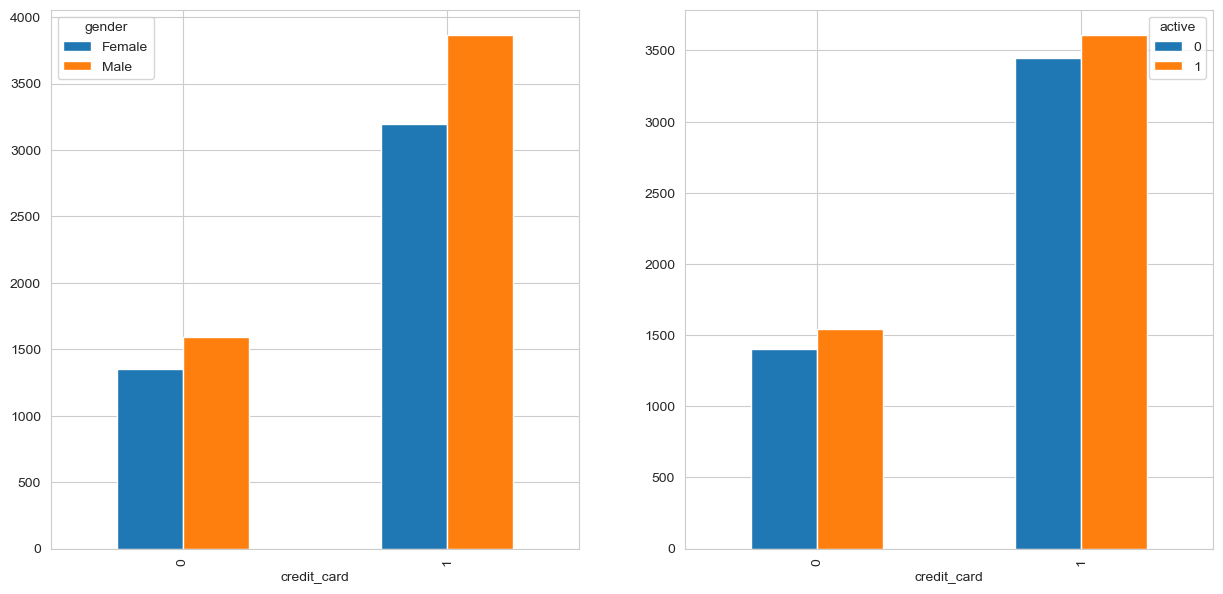

In [218]:
# Credit Card x Gender
# Credit Card x Active

bar_pairs(1, 0, 1, 2)

In [419]:
# Proportion of customers with a credit card who are female

total_credit = df[df['credit_card'] == 1].shape[0]

total_no_credit = df.shape[0] - total_credit
no_credit_female = df[(df['credit_card'] == 0) & (df['gender'] == 'Female')].shape[0]

print(f'{round(no_credit_female / total_no_credit * 100)}% of customers without a credit card are female')
print(f'{round(female_credit / total_credit * 100)}% of customers with a credit card are female')

46% of customers without a credit card are female
45% of customers with a credit card are female


In [340]:
# Proportion of customers with a credit card who are active

credit_active = df[(df['credit_card'] == 1) & (df['active'] == 1)].shape[0]
no_credit_active = df[(df['credit_card'] == 0) & (df['active'] == 1)].shape[0]

print(f'{round(no_credit_active / total_no_credit * 100)}% of customers without a credit card are active')
print(f'{round(credit_active / total_credit * 100)}% of customers with a credit card are active')

52% of customers without a credit card are active
51% of customers with a credit card are active


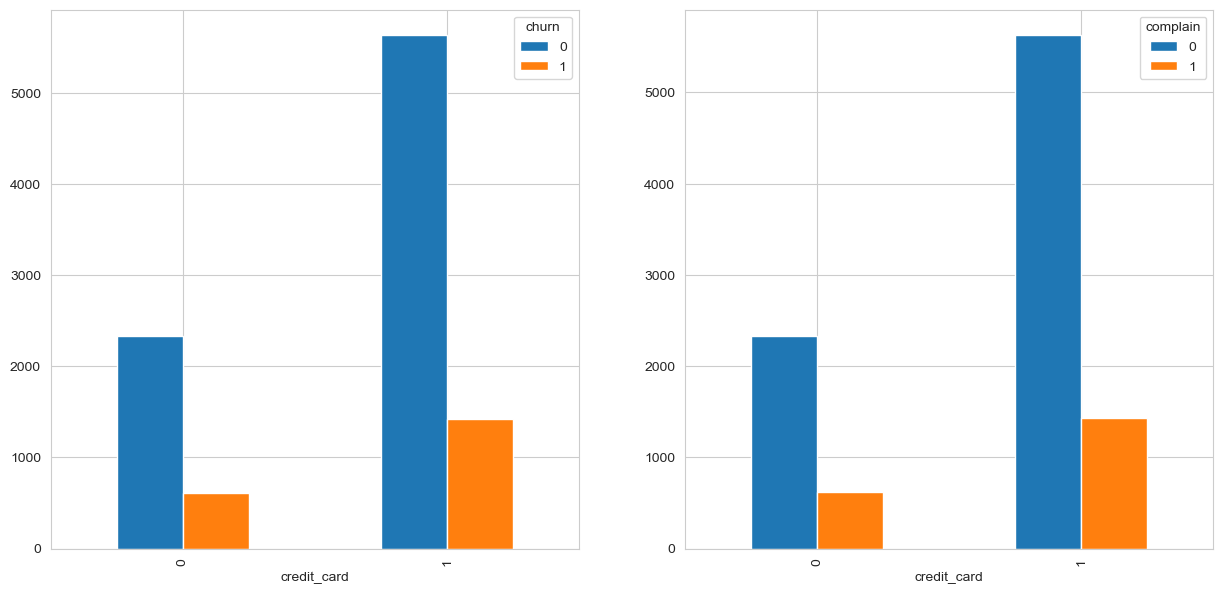

In [248]:
# Credit Card x Churn
# Credit Card x Complain

bar_pairs(1, 3, 1, 4)

In [342]:
# Proportion of customers with a credit card who churned

credit_churn = df[(df['credit_card'] == 1) & (df['churn'] == 1)].shape[0]
no_credit_churn = df[(df['credit_card'] == 0) & (df['churn'] == 1)].shape[0]

print(f'{round(no_credit_churn / total_no_credit * 100)}% of customers without a credit card churned')
print(f'{round(credit_churn / total_credit * 100)}% of customers with a credit card churned')

21% of customers without a credit card churned
20% of customers with a credit card churned


In [344]:
# Proportion of customers with a credit card who complained

credit_complain = df[(df['credit_card'] == 1) & (df['complain'] == 1)].shape[0]
no_credit_complain = df[(df['credit_card'] == 0) & (df['complain'] == 1)].shape[0]

print(f'{round(no_credit_complain / total_no_credit * 100)}% of customers without a credit card complained')
print(f'{round(credit_complain / total_credit * 100)}% of customers with a credit card complained')

21% of customers without a credit card complained
20% of customers with a credit card complained


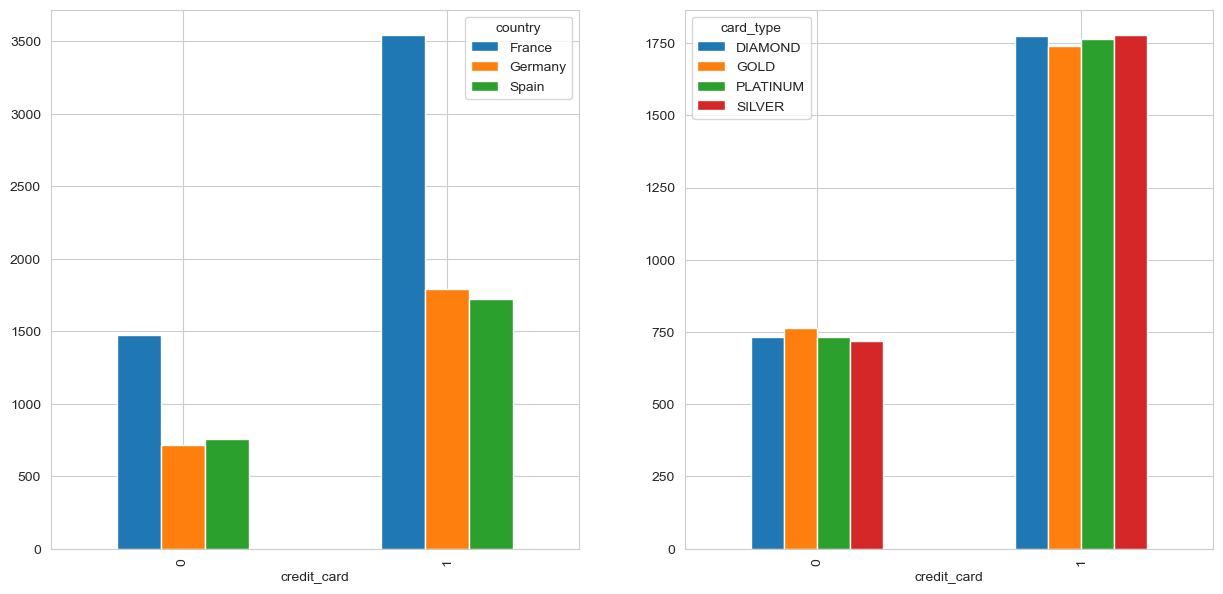

In [256]:
# Credit Card x Country
# Credit Card x Card Type

bar_pairs(1, 5, 1, 6)

In [346]:
# Proportions of customers with a credit card from each country

credit_France = df[(df['credit_card'] == 1) & (df['country'] == 'France')].shape[0]
credit_Germany = df[(df['credit_card'] == 1) & (df['country'] == 'Germany')].shape[0]
credit_Spain = total_credit - credit_France - credit_Germany

no_credit_France = df[(df['credit_card'] == 0) & (df['country'] == 'France')].shape[0]
no_credit_Germany = df[(df['credit_card'] == 0) & (df['country'] == 'Germany')].shape[0]
no_credit_Spain = total_no_credit - no_credit_France - no_credit_Germany

print(f'{round(no_credit_France / total_no_credit * 100)}% of customers without a credit card are from France')
print(f'{round(no_credit_Germany / total_no_credit * 100)}% of customers without a credit card are from Germany')
print(f'{round(no_credit_Spain / total_no_credit * 100)}% of customers without a credit card are from Spain\n')
print(f'{round(credit_France / total_credit * 100)}% of customers with a credit card are from France')
print(f'{round(credit_Germany / total_credit * 100)}% of customers with a credit card are from Germany')
print(f'{round(credit_Spain / total_credit * 100)}% of customers with a credit card are from Spain')

50% of customers without a credit card are from France
24% of customers without a credit card are from Germany
26% of customers without a credit card are from Spain

50% of customers with a credit card are from France
25% of customers with a credit card are from Germany
24% of customers with a credit card are from Spain


In [348]:
# Proportions of female and male customers with each card type

credit_diamond = df[(df['credit_card'] == 1) & (df['card_type'] == 'DIAMOND')].shape[0]
credit_gold = df[(df['credit_card'] == 1) & (df['card_type'] == 'GOLD')].shape[0]
credit_platinum = df[(df['credit_card'] == 1) & (df['card_type'] == 'PLATINUM')].shape[0]
credit_silver = total_credit - credit_diamond - credit_gold - credit_platinum

no_credit_diamond = df[(df['credit_card'] == 0) & (df['card_type'] == 'DIAMOND')].shape[0]
no_credit_gold = df[(df['credit_card'] == 0) & (df['card_type'] == 'GOLD')].shape[0]
no_credit_platinum = df[(df['credit_card'] == 0) & (df['card_type'] == 'PLATINUM')].shape[0]
no_credit_silver = total_no_credit - no_credit_diamond - no_credit_gold - no_credit_platinum

print(f'{round(no_credit_diamond / total_no_credit * 100)}% of customers without a credit card go diamond')
print(f'{round(no_credit_gold / total_no_credit * 100)}% of customers without a credit card go gold')
print(f'{round(no_credit_platinum / total_no_credit * 100)}% of customers without a credit card go platinum')
print(f'{round(no_credit_silver / total_no_credit * 100)}% of customers without a credit card go silver\n')
print(f'{round(credit_diamond / total_credit * 100)}% of customers with a credit card go diamond')
print(f'{round(credit_gold / total_credit * 100)}% of customers with a credit card go gold')
print(f'{round(credit_platinum / total_credit * 100)}% of customers with a credit card go platinum')
print(f'{round(credit_silver / total_credit * 100)}% of customers with a credit card go silver')

25% of customers without a credit card go diamond
26% of customers without a credit card go gold
25% of customers without a credit card go platinum
24% of customers without a credit card go silver

25% of customers with a credit card go diamond
25% of customers with a credit card go gold
25% of customers with a credit card go platinum
25% of customers with a credit card go silver


### Active

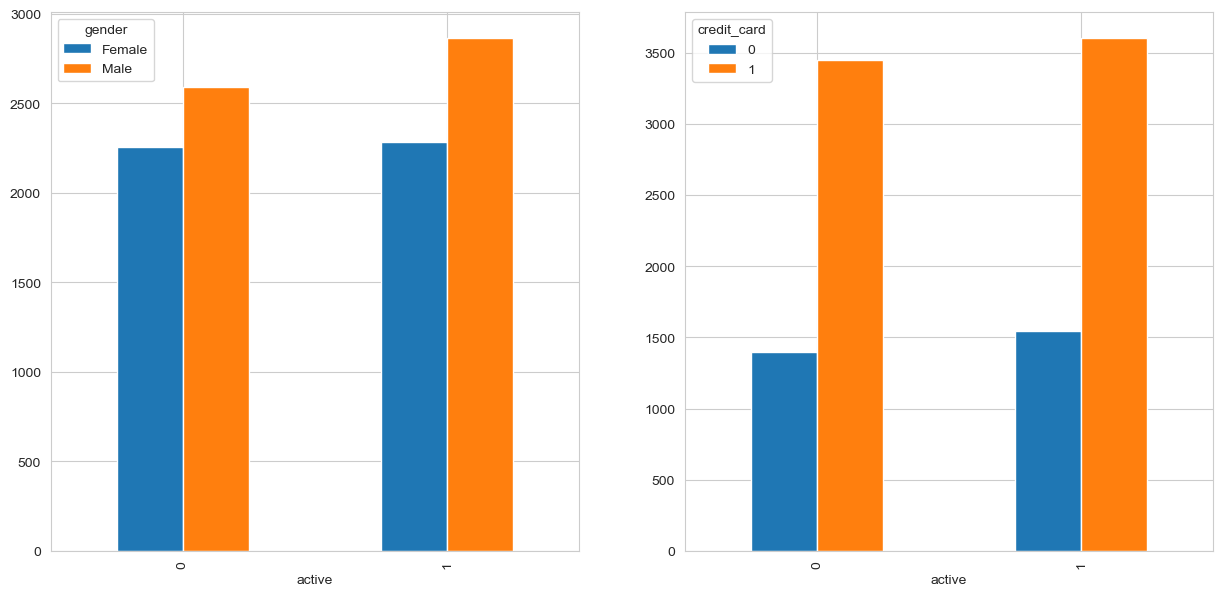

In [270]:
# Active x Gender
# Active x Credit Card

bar_pairs(2, 0, 2, 1)

In [421]:
# Proportion of active customers who are female

total_active = df[df['active'] == 1].shape[0]

total_not_active = df.shape[0] - total_active
not_active_female = df[(df['active'] == 0) & (df['gender'] == 'Female')].shape[0]

print(f'{round(not_active_female / total_not_active * 100)}% of non-active customers are female')
print(f'{round(female_active / total_active * 100)}% of active customers are female')

47% of non-active customers are female
44% of active customers are female


In [423]:
# Proportion of active customers who have a credit card

not_active_credit = df[(df['active'] == 0) & (df['credit_card'] == 1)].shape[0]

print(f'{round(not_active_credit / total_not_active * 100)}% of non-active customers have a credit card')
print(f'{round(credit_active / total_active * 100)}% of active customers have a credit card')

71% of non-active customers have a credit card
70% of active customers have a credit card


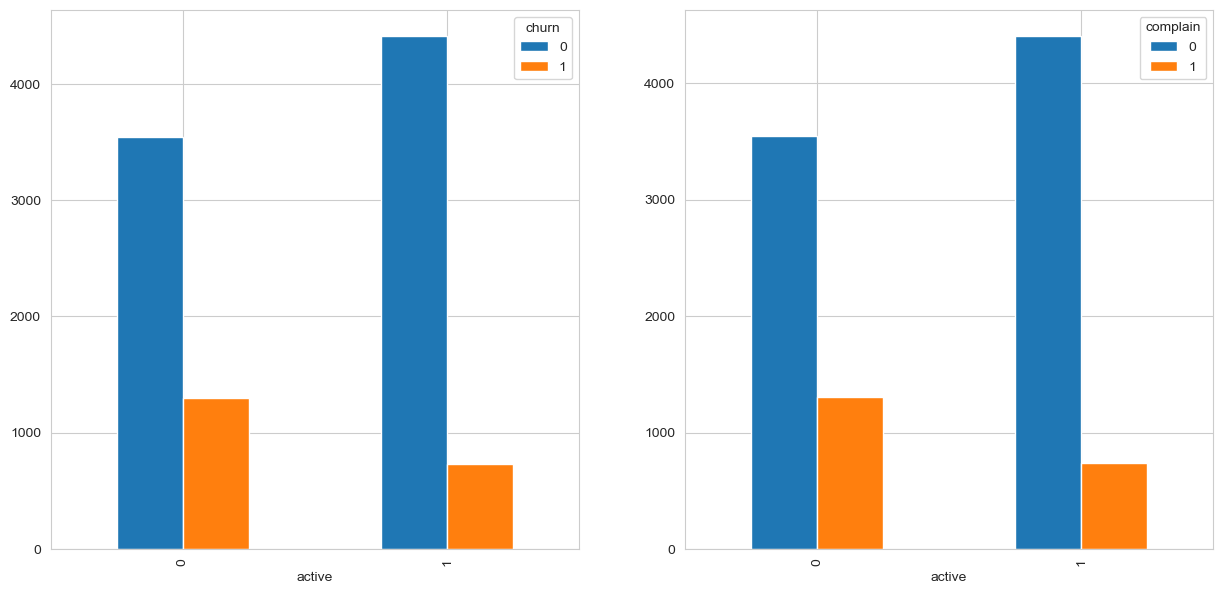

In [286]:
# Active x Churn
# Active x Complain

bar_pairs(2, 3, 2, 4)

In [354]:
# Proportion of active customers who churned

active_churn = df[(df['active'] == 1) & (df['churn'] == 1)].shape[0]

not_active_churn = df[(df['active'] == 0) & (df['churn'] == 1)].shape[0]

print(f'{round(not_active_churn / total_not_active * 100)}% of non-active customers churned')
print(f'{round(active_churn / total_active * 100)}% of active customers churned')

27% of non-active customers churned
14% of active customers churned


In [356]:
# Proportion of active customers who complained

active_complain = df[(df['active'] == 1) & (df['complain'] == 1)].shape[0]

not_active_complain = df[(df['active'] == 0) & (df['complain'] == 1)].shape[0]

print(f'{round(not_active_complain / total_not_active * 100)}% of non-active customers complained')
print(f'{round(active_complain / total_active * 100)}% of active customers complained')

27% of non-active customers complained
14% of active customers complained


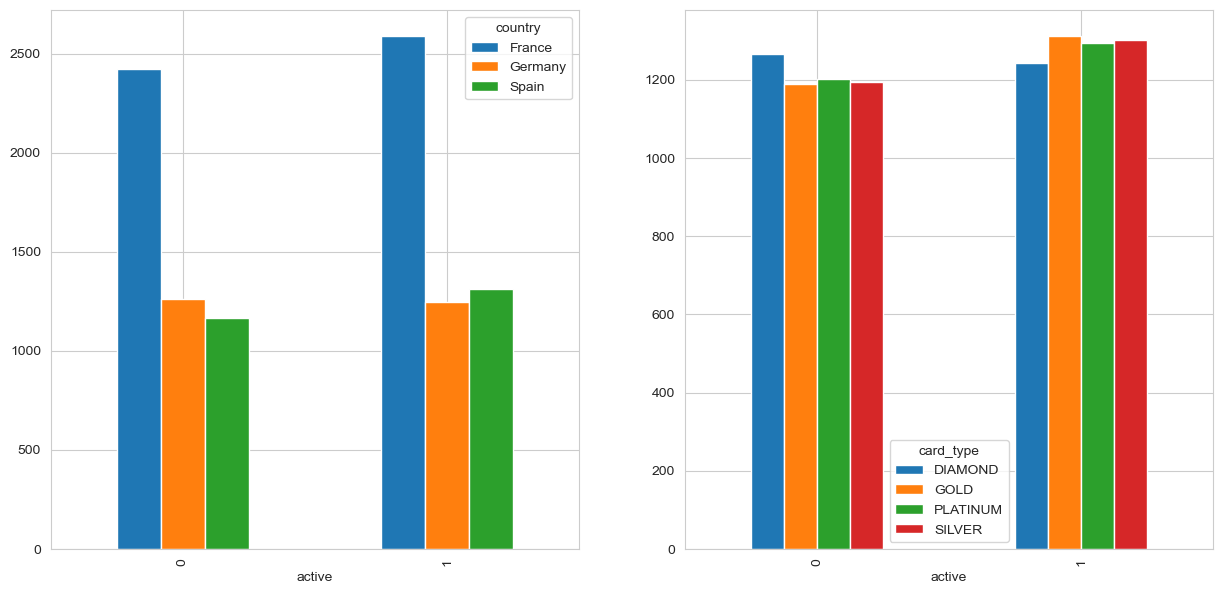

In [292]:
# Active x Country
# Active x Card Type

bar_pairs(2, 5, 2, 6)

In [358]:
# Proportion of active customers from each country

active_France = df[(df['active'] == 1) & (df['country'] == 'France')].shape[0]
active_Germany = df[(df['active'] == 1) & (df['country'] == 'Germany')].shape[0]
active_Spain = total_active - active_France - active_Germany

not_active_France = df[(df['active'] == 0) & (df['country'] == 'France')].shape[0]
not_active_Germany = df[(df['active'] == 0) & (df['country'] == 'Germany')].shape[0]
not_active_Spain = total_not_active - not_active_France - not_active_Germany

print(f'{round(not_active_France / total_not_active * 100)}% of non-active customers are from France')
print(f'{round(not_active_Germany / total_not_active * 100)}% of non-active customers are from Germany')
print(f'{round(not_active_Spain / total_not_active * 100)}% of non-active customers are from Spain\n')
print(f'{round(active_France / total_active * 100)}% of active customers are from France')
print(f'{round(active_Germany / total_active * 100)}% of active customers are from Germany')
print(f'{round(active_Spain / total_active * 100)}% of active customers are from Spain')

50% of non-active customers are from France
26% of non-active customers are from Germany
24% of non-active customers are from Spain

50% of active customers are from France
24% of active customers are from Germany
25% of active customers are from Spain


In [360]:
# Proportion of active customers with each card type

active_diamond = df[(df['active'] == 1) & (df['card_type'] == 'DIAMOND')].shape[0]
active_gold = df[(df['active'] == 1) & (df['card_type'] == 'GOLD')].shape[0]
active_platinum = df[(df['active'] == 1) & (df['card_type'] == 'PLATINUM')].shape[0]
active_silver = total_active - active_diamond - active_gold - active_platinum

not_active_diamond = df[(df['active'] == 0) & (df['card_type'] == 'DIAMOND')].shape[0]
not_active_gold = df[(df['active'] == 0) & (df['card_type'] == 'GOLD')].shape[0]
not_active_platinum = df[(df['active'] == 0) & (df['card_type'] == 'PLATINUM')].shape[0]
not_active_silver = total_not_active - not_active_diamond - not_active_gold - not_active_platinum

print(f'{round(not_active_diamond / total_not_active * 100)}% of non-active customers go diamond')
print(f'{round(not_active_gold / total_not_active * 100)}% of non-active customers go gold')
print(f'{round(not_active_platinum / total_not_active * 100)}% of non-active customers go platinum')
print(f'{round(not_active_silver / total_not_active * 100)}% of non-active customers go silver\n')
print(f'{round(active_diamond / total_active * 100)}% of active customers go diamond')
print(f'{round(active_gold / total_active * 100)}% of active customers go gold')
print(f'{round(active_platinum / total_active * 100)}% of active customers go platinum')
print(f'{round(active_silver / total_active * 100)}% of active customers go silver')

26% of non-active customers go diamond
25% of non-active customers go gold
25% of non-active customers go platinum
25% of non-active customers go silver

24% of active customers go diamond
25% of active customers go gold
25% of active customers go platinum
25% of active customers go silver


### Churn

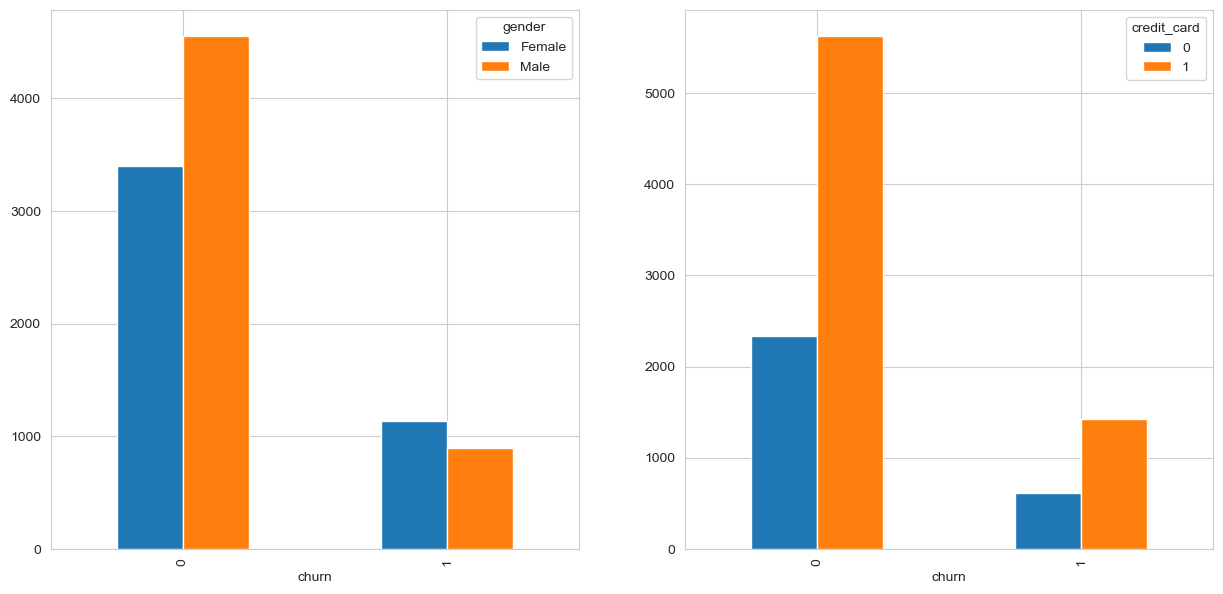

In [303]:
# Churn x Gender
# Churn x Credit Card

bar_pairs(3, 0, 3, 1)

In [425]:
# Proportion of churned customers who are female

total_churn = df[df['churn'] == 1].shape[0]

total_retain = df.shape[0] - total_churn
retain_female = df[(df['churn'] == 0) & (df['gender'] == 'Female')].shape[0]

print(f'{round(retain_female / total_retain * 100)}% of retained customers are female')
print(f'{round(female_churn / total_churn * 100)}% of churned customers are female')

43% of retained customers are female
56% of churned customers are female


In [427]:
# Proportion of churned customers with a credit card

retain_credit = df[(df['churn'] == 0) & (df['credit_card'] == 1)].shape[0]

print(f'{round(retain_credit / total_retain * 100)}% of retained customers have a credit card')
print(f'{round(credit_churn / total_churn * 100)}% of churned customers have a credit card')

71% of retained customers have a credit card
70% of churned customers have a credit card


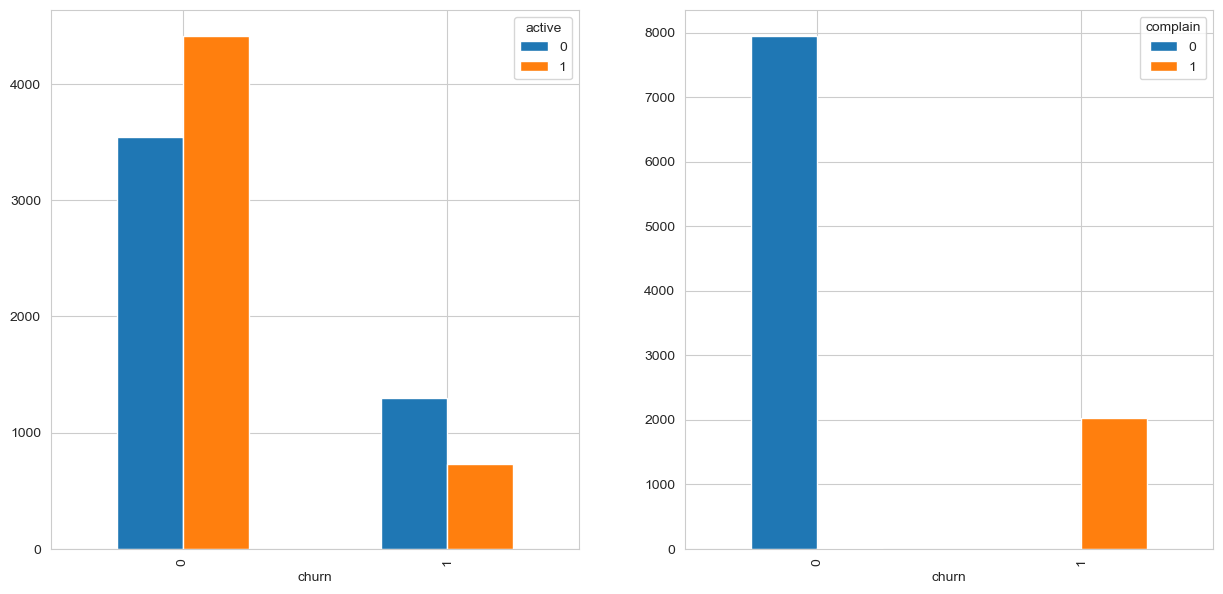

In [309]:
# Churn x Active
# Churn x Complain

bar_pairs(3, 2, 3, 4)

In [429]:
# Proportion of churned customers who were active

retain_active = df[(df['churn'] == 0) & (df['active'] == 1)].shape[0]

print(f'{round(retain_active / total_retain * 100)}% of retained customers are active')
print(f'{round(active_churn / total_churn * 100)}% of churned customers were active')

55% of retained customers are active
36% of churned customers were active


In [368]:
# Proportion of churned customers who complained

churn_complain = df[(df['churn'] == 1) & (df['complain'] == 1)].shape[0]

retain_complain = df[(df['churn'] == 0) & (df['complain'] == 1)].shape[0]

print(f'{round(retain_complain / total_retain * 100)}% of retained customers complained')
print(f'{round(churn_complain / total_churn * 100)}% of churned customers complained')

0% of retained customers complained
100% of churned customers complained


In [321]:
# Check official count of customers who churned and complained vs. customers who retained and complained

print(churn_complain)
print(retain_complain)

2034
10


Herein lies a golden insight: just about all customer who churned, complained. Only 10 customers complained and retained. This indicates that a strategy Fairway might pursue to retain more customers would be to improve its complaint resolution system.

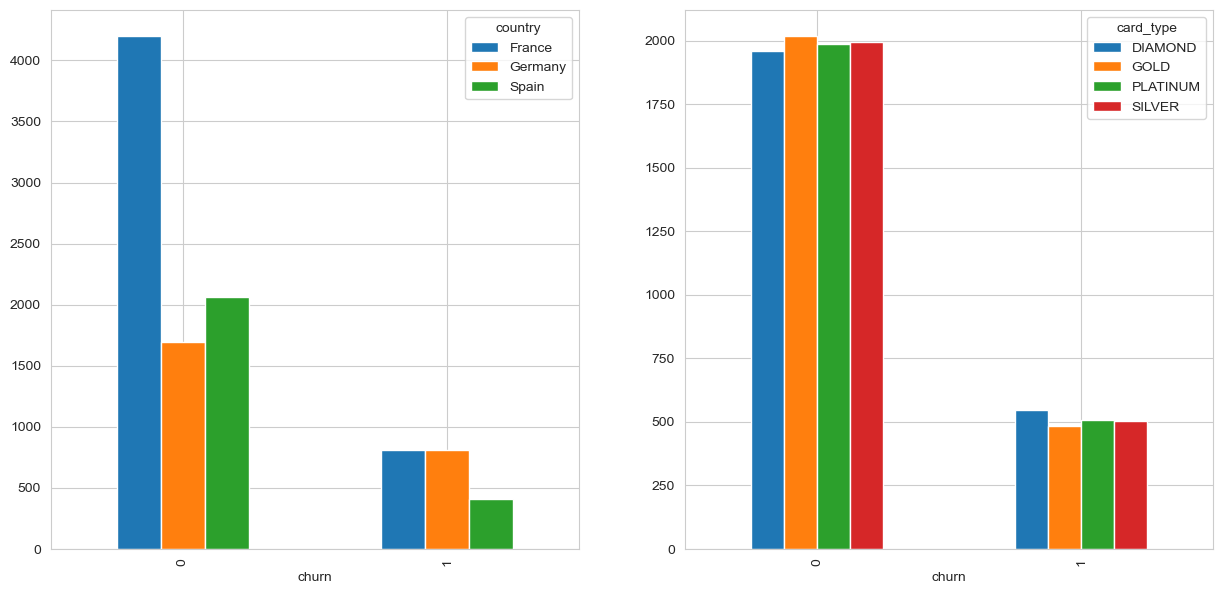

In [324]:
# Churn x Country
# Churn x Card Type

bar_pairs(3, 5, 3, 6)

In [370]:
# Proportion of churned customers from each country

churn_France = df[(df['churn'] == 1) & (df['country'] == 'France')].shape[0]
churn_Germany = df[(df['churn'] == 1) & (df['country'] == 'Germany')].shape[0]
churn_Spain = total_churn - churn_France - churn_Germany

retain_France = df[(df['churn'] == 0) & (df['country'] == 'France')].shape[0]
retain_Germany = df[(df['churn'] == 0) & (df['country'] == 'Germany')].shape[0]
retain_Spain = total_retain - retain_France - retain_Germany

print(f'{round(retain_France / total_retain * 100)}% of retained customers are from France')
print(f'{round(retain_Germany / total_retain * 100)}% of retained customers are from Germany')
print(f'{round(retain_Spain / total_retain * 100)}% of retained customers are from Spain\n')
print(f'{round(churn_France / total_churn * 100)}% of churned customers are from France')
print(f'{round(churn_Germany / total_churn * 100)}% of churned customers are from Germany')
print(f'{round(churn_Spain / total_churn * 100)}% of churned customers are from Spain')

53% of retained customers are from France
21% of retained customers are from Germany
26% of retained customers are from Spain

40% of churned customers are from France
40% of churned customers are from Germany
20% of churned customers are from Spain


In [372]:
# Proportion of active customers with each card type

churn_diamond = df[(df['churn'] == 1) & (df['card_type'] == 'DIAMOND')].shape[0]
churn_gold = df[(df['churn'] == 1) & (df['card_type'] == 'GOLD')].shape[0]
churn_platinum = df[(df['churn'] == 1) & (df['card_type'] == 'PLATINUM')].shape[0]
churn_silver = total_churn - churn_diamond - churn_gold - churn_platinum

retain_diamond = df[(df['churn'] == 0) & (df['card_type'] == 'DIAMOND')].shape[0]
retain_gold = df[(df['churn'] == 0) & (df['card_type'] == 'GOLD')].shape[0]
retain_platinum = df[(df['churn'] == 0) & (df['card_type'] == 'PLATINUM')].shape[0]
retain_silver = total_retain - retain_diamond - retain_gold - retain_platinum

print(f'{round(retain_diamond / total_retain * 100)}% of retained customers go diamond')
print(f'{round(retain_gold / total_retain * 100)}% of retained customers go gold')
print(f'{round(retain_platinum / total_retain * 100)}% of retained customers go platinum')
print(f'{round(retain_silver / total_retain * 100)}% of retained customers go silver\n')
print(f'{round(churn_diamond / total_churn * 100)}% of churned customers go diamond')
print(f'{round(churn_gold / total_churn * 100)}% of churned customers go gold')
print(f'{round(churn_platinum / total_churn * 100)}% of churned customers go platinum')
print(f'{round(churn_silver / total_churn * 100)}% of churned customers go silver')

25% of retained customers go diamond
25% of retained customers go gold
25% of retained customers go platinum
25% of retained customers go silver

27% of churned customers go diamond
24% of churned customers go gold
25% of churned customers go platinum
25% of churned customers go silver


### Complain

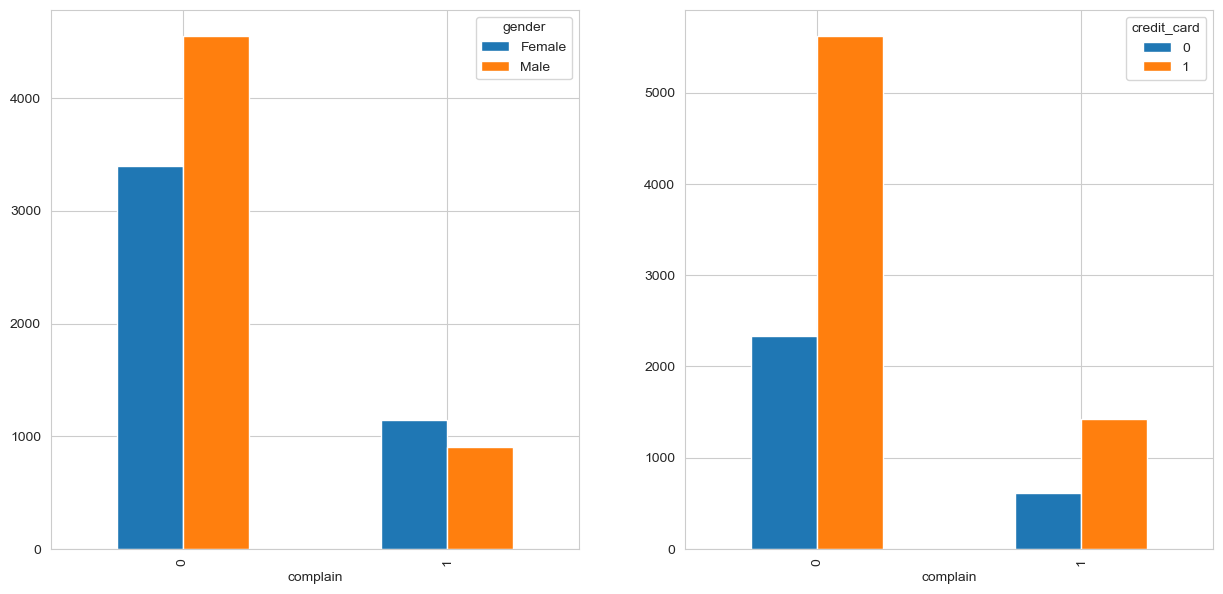

In [376]:
# Complain x Gender
# Complain x Credit Card

bar_pairs(4, 0, 4, 1)

In [431]:
# Proportion of customers who complained who are female

total_complain = df[df['complain'] == 1].shape[0]

total_not_complain = df.shape[0] - total_complain
not_complain_female = df[(df['complain'] == 0) & (df['gender'] == 'Female')].shape[0]

print(f'{round(not_complain_female / total_not_complain * 100)}% of customers who didn\'t complain are female')
print(f'{round(female_complain / total_complain * 100)}% of customers who complained are female')

43% of customers who didn't complain are female
56% of customers who complained are female


In [433]:
# Proportion of customers who complained who have a credit card

not_complain_credit = df[(df['complain'] == 0) & (df['credit_card'] == 1)].shape[0]

print(f'{round(not_complain_credit / total_not_complain * 100)}% of customers who didn\'t complain have a credit card')
print(f'{round(credit_complain / total_complain * 100)}% of customers who complained have a credit card')

71% of customers who didn't complain have a credit card
70% of customers who complained have a credit card


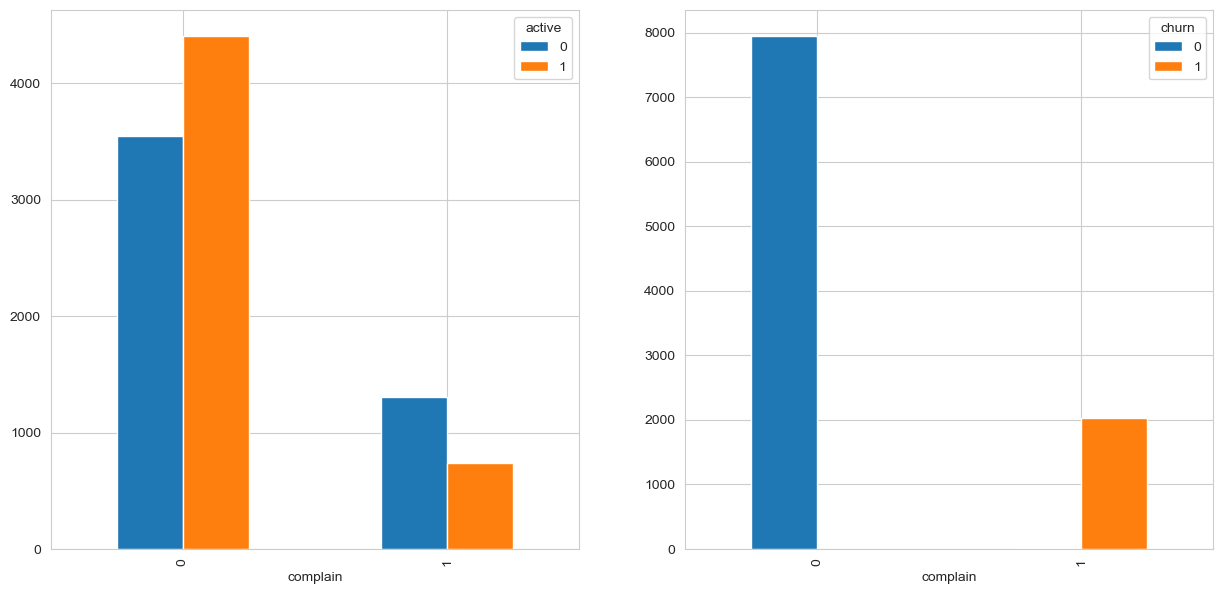

In [388]:
# Complain x Active
# Complain x Churn

bar_pairs(4, 2, 4, 3)

In [435]:
# Proportion of customers who complained who are active

not_complain_active = df[(df['complain'] == 0) & (df['active'] == 1)].shape[0]

print(f'{round(not_complain_active / total_not_complain * 100)}% of customers who didn\'t complaint are active')
print(f'{round(active_complain / total_complain * 100)}% of customers who complained are active')

55% of customers who didn't complaint are active
36% of customers who complained are active


In [437]:
# Proportion of customers who complained who churned

not_complain_churn = df[(df['complain'] == 0) & (df['churn'] == 1)].shape[0]

print(f'{round(not_complain_churn / total_not_complain * 100)}% of customers who didn\'t complaint churned')
print(f'{round(churn_complain / total_complain * 100)}% of customers who complained churned')

0% of customers who didn't complaint churned
100% of customers who complained churned


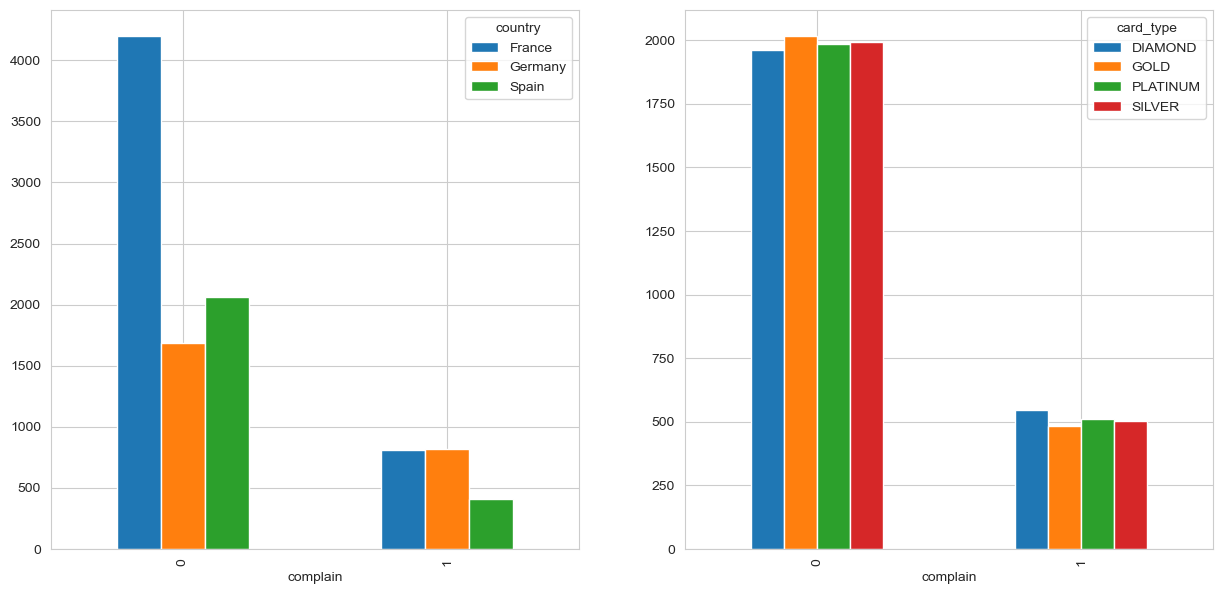

In [408]:
# Complain x Country
# Complain x Card Type

bar_pairs(4, 5, 4, 6)

In [410]:
# Proportion of customers who complained from each country

complain_France = df[(df['complain'] == 1) & (df['country'] == 'France')].shape[0]
complain_Germany = df[(df['complain'] == 1) & (df['country'] == 'Germany')].shape[0]
complain_Spain = total_complain - complain_France - complain_Germany

not_complain_France = df[(df['complain'] == 0) & (df['country'] == 'France')].shape[0]
not_complain_Germany = df[(df['complain'] == 0) & (df['country'] == 'Germany')].shape[0]
not_complain_Spain = total_not_complain - not_complain_France - not_complain_Germany

print(f'{round(not_complain_France / total_not_complain * 100)}% of customers who didn\'t complain are from France')
print(f'{round(not_complain_Germany / total_not_complain * 100)}% of customers who didn\'t complain are from Germany')
print(f'{round(not_complain_Spain / total_not_complain * 100)}% of customers who didn\'t complain are from Spain\n')
print(f'{round(complain_France / total_complain * 100)}% of customers who complained are from France')
print(f'{round(complain_Germany / total_complain * 100)}% of customers who complained are from Germany')
print(f'{round(complain_Spain / total_complain * 100)}% of customers who complained are from Spain')

53% of customers who didn't complain are from France
21% of customers who didn't complain are from Germany
26% of customers who didn't complain are from Spain

40% of customers who complained are from France
40% of customers who complained are from Germany
20% of customers who complained are from Spain


In [412]:
# Proportion of customers who complained with each card type

complain_diamond = df[(df['complain'] == 1) & (df['card_type'] == 'DIAMOND')].shape[0]
complain_gold = df[(df['complain'] == 1) & (df['card_type'] == 'GOLD')].shape[0]
complain_platinum = df[(df['complain'] == 1) & (df['card_type'] == 'PLATINUM')].shape[0]
complain_silver = total_complain - complain_diamond - complain_gold - complain_platinum

not_complain_diamond = df[(df['complain'] == 0) & (df['card_type'] == 'DIAMOND')].shape[0]
not_complain_gold = df[(df['complain'] == 0) & (df['card_type'] == 'GOLD')].shape[0]
not_complain_platinum = df[(df['complain'] == 0) & (df['card_type'] == 'PLATINUM')].shape[0]
not_complain_silver = total_not_complain - not_complain_diamond - not_complain_gold - not_complain_platinum

print(f'{round(not_complain_diamond / total_not_complain * 100)}% of customers who didn\'t complain go diamond')
print(f'{round(not_complain_gold / total_not_complain * 100)}% of customers who didn\'t complain go gold')
print(f'{round(not_complain_platinum / total_not_complain * 100)}% of customers who didn\'t complain go platinum')
print(f'{round(not_complain_silver / total_not_complain * 100)}% of customers who didn\'t complain go silver\n')
print(f'{round(complain_diamond / total_complain * 100)}% of customers who complained go diamond')
print(f'{round(complain_gold / total_complain * 100)}% of customers who complained go gold')
print(f'{round(complain_platinum / total_complain * 100)}% of customers who complained go platinum')
print(f'{round(complain_silver / total_complain * 100)}% of customers who complained go silver')

25% of customers who didn't complain go diamond
25% of customers who didn't complain go gold
25% of customers who didn't complain go platinum
25% of customers who didn't complain go silver

27% of customers who complained go diamond
24% of customers who complained go gold
25% of customers who complained go platinum
25% of customers who complained go silver


### Country

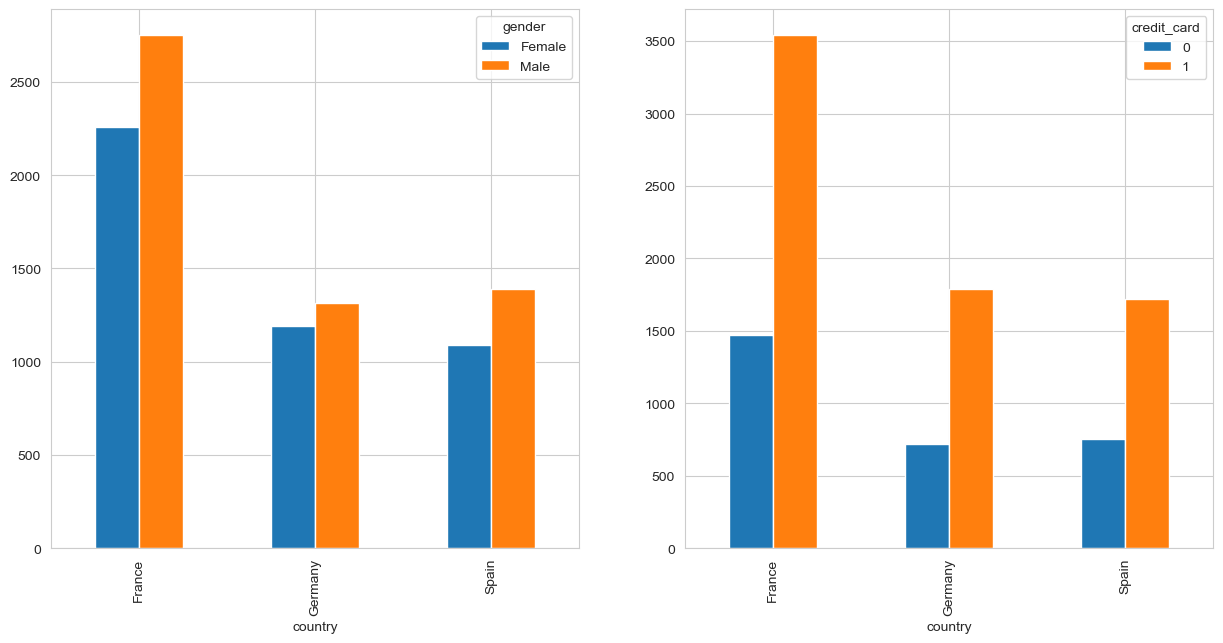

In [415]:
# Country x Gender
# Counrty x Credit Card

bar_pairs(5, 0, 5, 1)

In [417]:
# Proportion of customers from each country who are female

total_France = df[df['country'] == 'France'].shape[0]
total_Germany = df[df['country'] == 'Germany'].shape[0]
total_Spain = df.shape[0] - total_France - total_Germany

print(f'{round(female_France / total_France * 100)}% of customers from France are female')
print(f'{round(female_Germany / total_Germany * 100)}% of customers from Germany are female')
print(f'{round(female_Spain / total_Spain * 100)}% of customers from Spain are female')

45% of customers from France are female
48% of customers from Germany are female
44% of customers from Spain are female


In [439]:
# Proportion of customers from each country who have a credit card

print(f'{round(credit_France / total_France * 100)}% of customers from France have a credit card')
print(f'{round(credit_Germany / total_Germany * 100)}% of customers from Germany have a credit card')
print(f'{round(credit_Spain / total_Spain * 100)}% of customers from Spain have a credit card')

71% of customers from France have a credit card
71% of customers from Germany have a credit card
69% of customers from Spain have a credit card


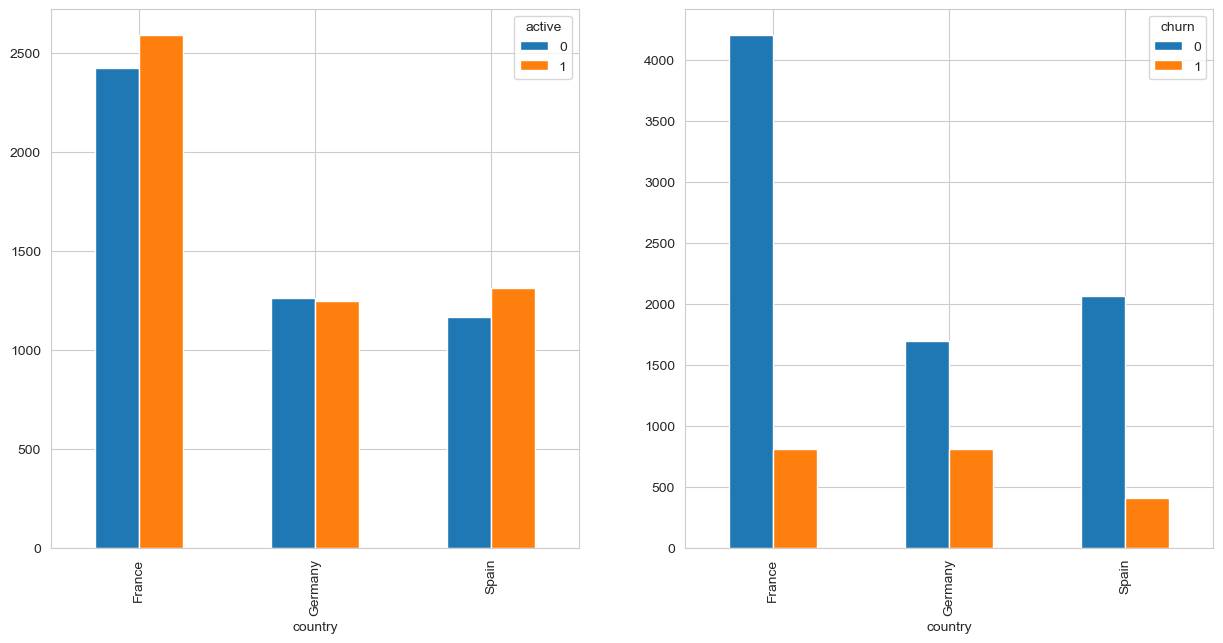

In [441]:
# Country x Active
# Country x Churn

bar_pairs(5, 2, 5, 3)

In [443]:
# Proportion of customers from each country who are active

print(f'{round(active_France / total_France * 100)}% of customers from France are active')
print(f'{round(active_Germany / total_Germany * 100)}% of customers from Germany are active')
print(f'{round(active_Spain / total_Spain * 100)}% of customers from Spain are active')

52% of customers from France are active
50% of customers from Germany are active
53% of customers from Spain are active


In [447]:
# Proportion of customers from each country who churned

print(f'{round(churn_France / total_France * 100)}% of customers from France churned')
print(f'{round(churn_Germany / total_Germany * 100)}% of customers from Germany churned')
print(f'{round(churn_Spain / total_Spain * 100)}% of customers from Spain churned')

16% of customers from France churned
32% of customers from Germany churned
17% of customers from Spain churned


Churn rates are twice as high in Germany as they are in France or Spain.

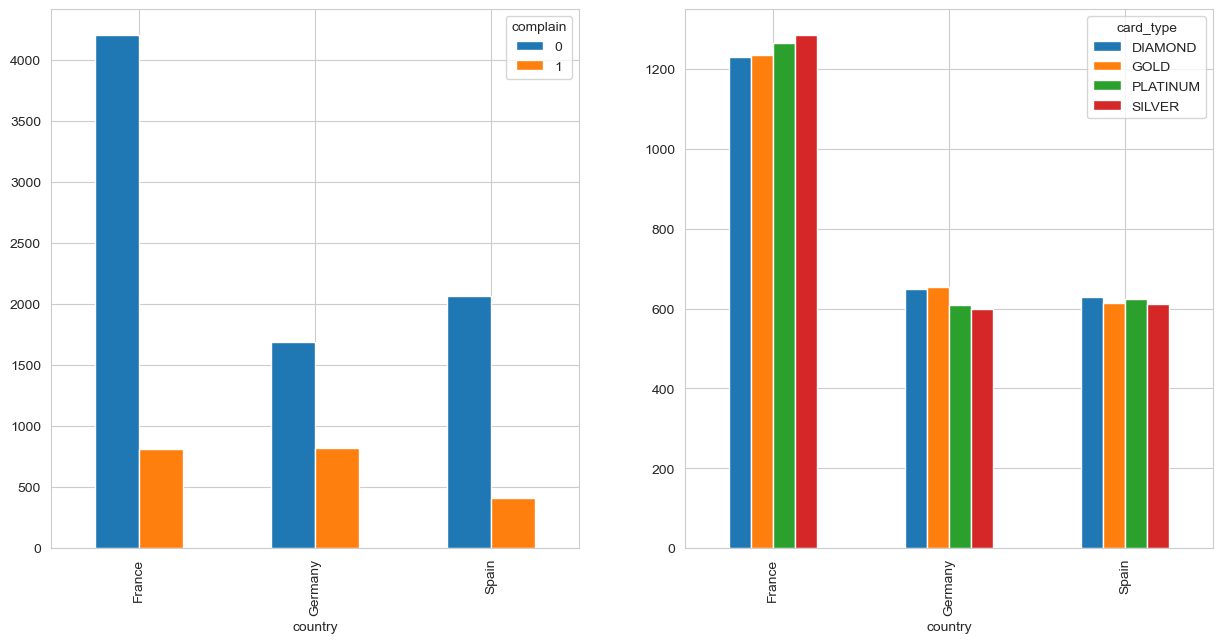

In [450]:
# Country x Complain
# Country x Card Type

bar_pairs(5, 4, 5, 6)

In [452]:
# Proportion of customers from each country who complained

print(f'{round(complain_France / total_France * 100)}% of customers from France complained')
print(f'{round(complain_Germany / total_Germany * 100)}% of customers from Germany complained')
print(f'{round(complain_Spain / total_Spain * 100)}% of customers from Spain complained')

16% of customers from France complained
33% of customers from Germany complained
17% of customers from Spain complained


As with churn, we see that twice as many customers from Germany complained than from France or Spain. This might indicate that Fairway should monitor its German branches to understand why they are garnering more complaints.

In [455]:
# Proportion of customers from each country with each card type

France_diamond = df[(df['country'] == 'France') & (df['card_type'] == 'DIAMOND')].shape[0]
France_gold = df[(df['country'] == 'France') & (df['card_type'] == 'GOLD')].shape[0]
France_platinum = df[(df['country'] == 'France') & (df['card_type'] == 'PLATINUM')].shape[0]
France_silver = df[(df['country'] == 'France') & (df['card_type'] == 'SILVER')].shape[0]

Germany_diamond = df[(df['country'] == 'Germany') & (df['card_type'] == 'DIAMOND')].shape[0]
Germany_gold = df[(df['country'] == 'Germany') & (df['card_type'] == 'GOLD')].shape[0]
Germany_platinum = df[(df['country'] == 'Germany') & (df['card_type'] == 'PLATINUM')].shape[0]
Germany_silver = df[(df['country'] == 'Germany') & (df['card_type'] == 'SILVER')].shape[0]

Spain_diamond = df[(df['country'] == 'Spain') & (df['card_type'] == 'DIAMOND')].shape[0]
Spain_gold = df[(df['country'] == 'Spain') & (df['card_type'] == 'GOLD')].shape[0]
Spain_platinum = df[(df['country'] == 'Spain') & (df['card_type'] == 'PLATINUM')].shape[0]
Spain_silver = df[(df['country'] == 'Spain') & (df['card_type'] == 'SILVER')].shape[0]

print(f'{round(France_diamond / total_France * 100)}% of customers from France go diamond')
print(f'{round(France_gold / total_France * 100)}% of customers from France go gold')
print(f'{round(France_platinum / total_France * 100)}% of customers from France go platinum')
print(f'{round(France_silver / total_France * 100)}% of customers from France go silver\n')

print(f'{round(Germany_diamond / total_Germany * 100)}% of customers from Germany go diamond')
print(f'{round(Germany_gold / total_Germany * 100)}% of customers from Germany go gold')
print(f'{round(Germany_platinum / total_Germany * 100)}% of customers from Germany go platinum')
print(f'{round(Germany_silver / total_Germany * 100)}% of customers from Germany go silver\n')

print(f'{round(Spain_diamond / total_Spain * 100)}% of customers from Spain go diamond')
print(f'{round(Spain_gold / total_Spain * 100)}% of customers from Spain go gold')
print(f'{round(Spain_platinum / total_Spain * 100)}% of customers from Spain go platinum')
print(f'{round(Spain_silver / total_Spain * 100)}% of customers from Spain go silver\n')

25% of customers from France go diamond
25% of customers from France go gold
25% of customers from France go platinum
26% of customers from France go silver

26% of customers from Germany go diamond
26% of customers from Germany go gold
24% of customers from Germany go platinum
24% of customers from Germany go silver

25% of customers from Spain go diamond
25% of customers from Spain go gold
25% of customers from Spain go platinum
25% of customers from Spain go silver



### Card Type

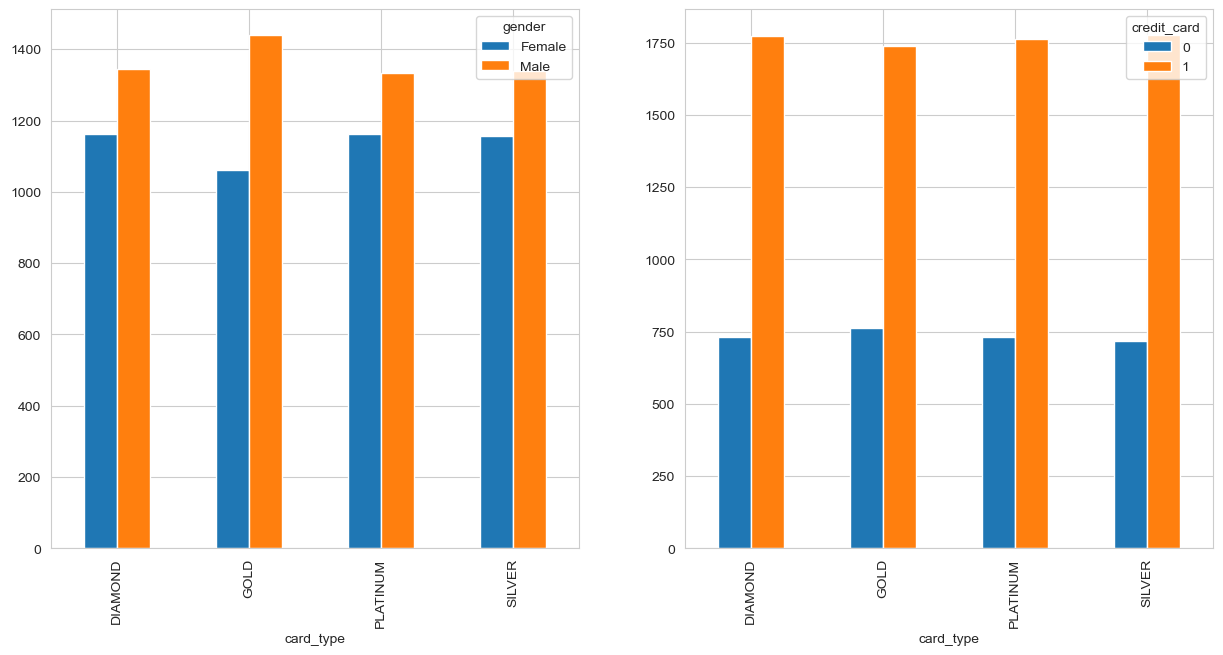

In [458]:
# Card Type x Gender
# Card Type x Credit Card

bar_pairs(6, 0, 6, 1)

In [460]:
# Proportion of customers with each card type who are female

total_diamond = df[df['card_type'] == 'DIAMOND'].shape[0]
total_gold = df[df['card_type'] == 'GOLD'].shape[0]
total_platinum = df[df['card_type'] == 'PLATINUM'].shape[0]
total_silver = df[df['card_type'] == 'SILVER'].shape[0]

print(f'{round(female_diamond / total_diamond * 100)}% of diamond customers are female')
print(f'{round(female_gold / total_gold * 100)}% of gold customers are female')
print(f'{round(female_platinum / total_platinum * 100)}% of platinum customers are female')
print(f'{round(female_silver / total_silver * 100)}% of silver customers are female')

46% of diamond customers are female
42% of gold customers are female
47% of platinum customers are female
46% of silver customers are female


In [462]:
# Proportion of customers with each card type who have a credit card

print(f'{round(credit_diamond / total_diamond * 100)}% of diamond customers have a credit card')
print(f'{round(credit_gold / total_gold * 100)}% of gold customers have a credit card')
print(f'{round(credit_platinum / total_platinum * 100)}% of platinum customers have a credit card')
print(f'{round(credit_silver / total_silver * 100)}% of silver customers have a credit card')

71% of diamond customers have a credit card
70% of gold customers have a credit card
71% of platinum customers have a credit card
71% of silver customers have a credit card


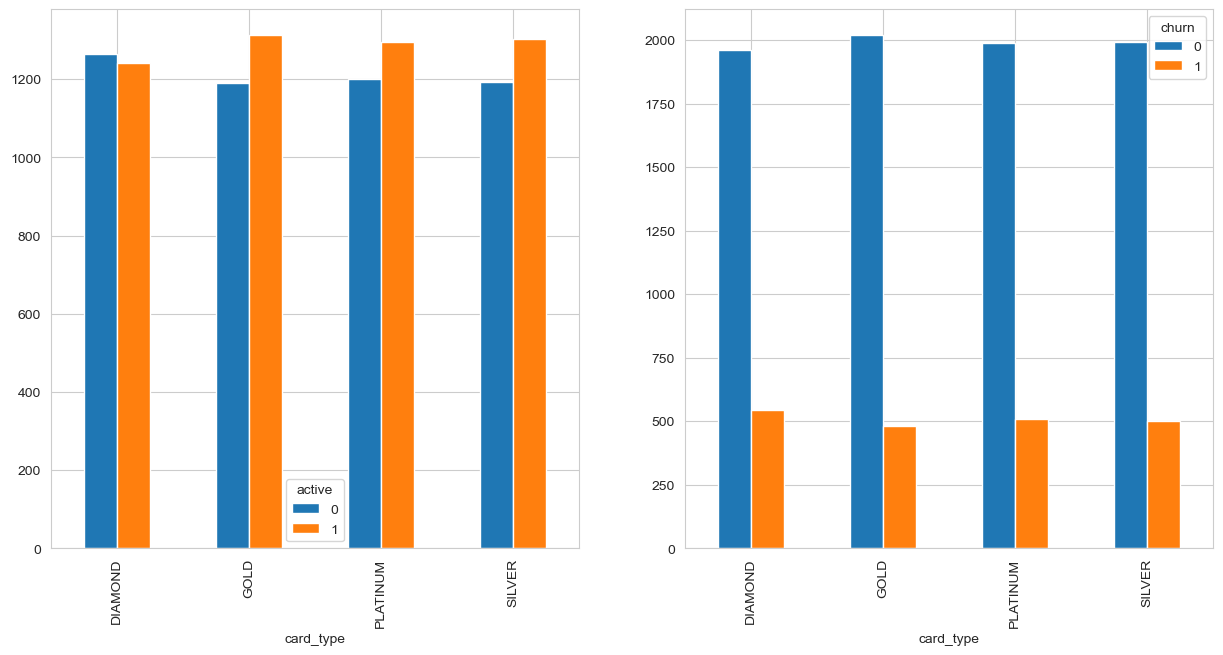

In [464]:
# Card Type x Active
# Card Type x Churn

bar_pairs(6, 2, 6, 3)

In [466]:
# Proportion of customers with each card type who are active

print(f'{round(active_diamond / total_diamond * 100)}% of diamond customers are active')
print(f'{round(active_gold / total_gold * 100)}% of gold customers are active')
print(f'{round(active_platinum / total_platinum * 100)}% of platinum customers are active')
print(f'{round(active_silver / total_silver * 100)}% of silver customers are active')

50% of diamond customers are active
52% of gold customers are active
52% of platinum customers are active
52% of silver customers are active


In [472]:
# Proportion of customers with each card type who churned

print(f'{round(churn_diamond / total_diamond * 100)}% of diamond customers churned')
print(f'{round(churn_gold / total_gold * 100)}% of gold customers churned')
print(f'{round(churn_platinum / total_platinum * 100)}% of platinum customers churned')
print(f'{round(churn_silver / total_silver * 100)}% of silver customers churned')

22% of diamond customers churned
19% of gold customers churned
20% of platinum customers churned
20% of silver customers churned


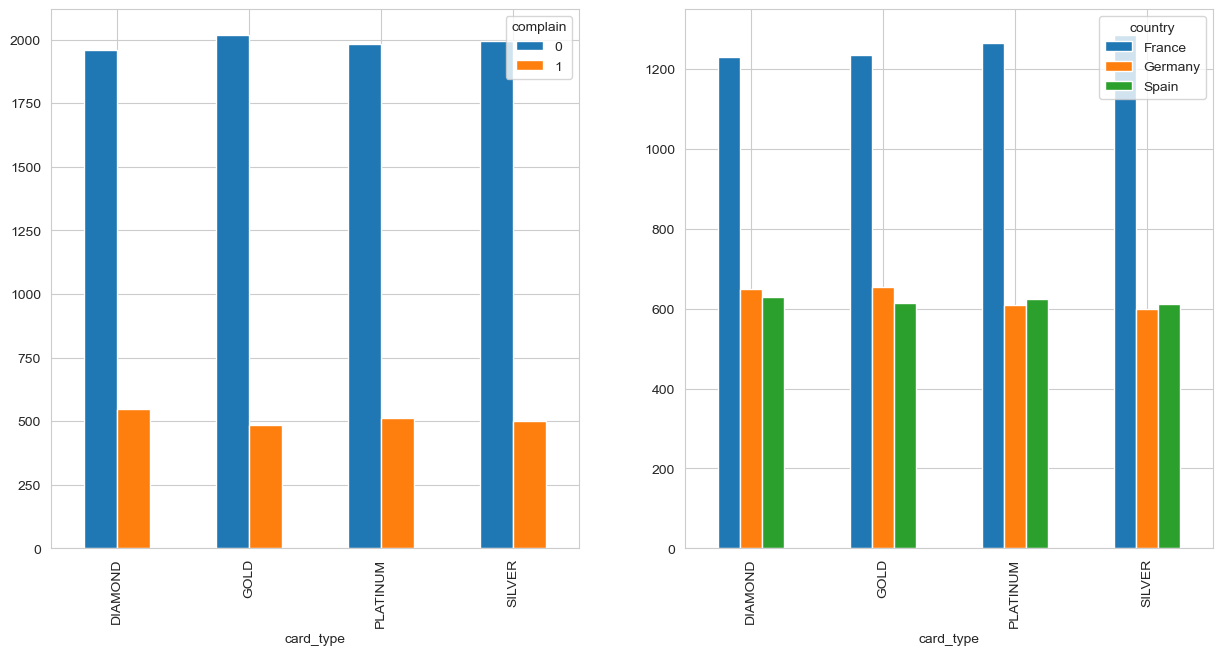

In [468]:
# Card Type x Complain
# Card Type x Country

bar_pairs(6, 4, 6, 5)

In [470]:
# Proportion of customers with each card type who complained

print(f'{round(complain_diamond / total_diamond * 100)}% of diamond customers complained')
print(f'{round(complain_gold / total_gold * 100)}% of gold customers complained')
print(f'{round(complain_platinum / total_platinum * 100)}% of platinum customers complained')
print(f'{round(complain_silver / total_silver * 100)}% of silver customers complained')

22% of diamond customers complained
19% of gold customers complained
20% of platinum customers complained
20% of silver customers complained


In [476]:
# Proportion of customers with each card from each country

print(f'{round(France_diamond / total_diamond * 100)}% of diamond customers are from France')
print(f'{round(Germany_diamond / total_diamond * 100)}% of diamond customers are from Germany')
print(f'{round(Spain_diamond / total_diamond * 100)}% of diamond customers are from Spain\n')

print(f'{round(France_gold / total_gold * 100)}% of gold customers are from France')
print(f'{round(Germany_gold / total_gold * 100)}% of gold customers are from Germany')
print(f'{round(Spain_gold / total_gold * 100)}% of gold customers are from Spain\n')

print(f'{round(France_platinum / total_platinum * 100)}% of platinum customers are from France')
print(f'{round(Germany_platinum / total_platinum * 100)}% of platinum customers are from Germany')
print(f'{round(Spain_platinum / total_platinum * 100)}% of platinum customers are from Spain\n')

print(f'{round(France_silver / total_silver * 100)}% of silver customers are from France')
print(f'{round(Germany_silver / total_silver * 100)}% of silver customers are from Germany')
print(f'{round(Spain_silver / total_silver * 100)}% of silver customers are from Spain\n')

49% of diamond customers are from France
26% of diamond customers are from Germany
25% of diamond customers are from Spain

49% of gold customers are from France
26% of gold customers are from Germany
25% of gold customers are from Spain

51% of platinum customers are from France
24% of platinum customers are from Germany
25% of platinum customers are from Spain

51% of silver customers are from France
24% of silver customers are from Germany
24% of silver customers are from Spain

